# Análisis Exploratorio de Datos (EDA) - Dataset de Riesgo Crediticio
## Metodología CRISP-DM

### 1. Comprensión del Negocio (Business Understanding)
Este análisis se enfoca en comprender los patrones y características de los préstamos que pueden ayudar a predecir el riesgo de incumplimiento crediticio.

### 2. Comprensión de los Datos (Data Understanding)
Dataset: `credit_risk_dataset.csv`
- **Objetivo**: Analizar patrones en datos de préstamos para identificar factores de riesgo
- **Variable objetivo**: `loan_status` (0 = pago a tiempo, 1 = incumplimiento)
- **Tamaño**: 32,581 registros con 12 variables


In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Librerías básicas importadas correctamente")


Librerías básicas importadas correctamente


In [ ]:
# Cargar el dataset
df = pd.read_csv('credit_risk_dataset.csv')

# Información básica del dataset
print("="*60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*60)
print(f"Forma del dataset: {df.shape}")
print(f"Número de registros: {df.shape[0]:,}")
print(f"Número de variables: {df.shape[1]}")

print("\n" + "="*60)
print("NOMBRES DE LAS VARIABLES")
print("="*60)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "="*60)
print("TIPOS DE DATOS")
print("="*60)
print(df.dtypes)

print("\n" + "="*60)
print("VALORES FALTANTES")
print("="*60)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Valores_Faltantes': missing_values,
    'Porcentaje': missing_percent
})
print(missing_df[missing_df['Valores_Faltantes'] > 0])


INFORMACIÓN GENERAL DEL DATASET
Forma del dataset: (32581, 12)
Número de registros: 32,581
Número de variables: 12

NOMBRES DE LAS VARIABLES
 1. person_age
 2. person_income
 3. person_home_ownership
 4. person_emp_length
 5. loan_intent
 6. loan_grade
 7. loan_amnt
 8. loan_int_rate
 9. loan_status
10. loan_percent_income
11. cb_person_default_on_file
12. cb_person_cred_hist_length

TIPOS DE DATOS
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

VALORES FALTANTES
                   Valores_Faltantes  Porcentaje
person_emp_length                895    2.747000
loan_int_ra

In [ ]:
# Análisis de las primeras filas del dataset
print("="*60)
print("PRIMERAS 5 FILAS DEL DATASET")
print("="*60)
print(df.head())

print("\n" + "="*60)
print("ÚLTIMAS 5 FILAS DEL DATASET")
print("="*60)
print(df.tail())

print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*60)
print(df.describe())


PRIMERAS 5 FILAS DEL DATASET
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y  

### 3. Preparación de los Datos (Data Preparation)

#### 3.1 Análisis de Valores Faltantes
- **person_emp_length**: 895 valores faltantes (2.75%)
- **loan_int_rate**: 3,116 valores faltantes (9.56%)

#### 3.2 Identificación de Variables
**Variables Numéricas:**
- `person_age`: Edad del solicitante
- `person_income`: Ingresos del solicitante
- `person_emp_length`: Años de empleo
- `loan_amnt`: Monto del préstamo
- `loan_int_rate`: Tasa de interés
- `loan_percent_income`: Porcentaje de ingresos destinado al préstamo
- `cb_person_cred_hist_length`: Historial crediticio

**Variables Categóricas:**
- `person_home_ownership`: Tipo de vivienda
- `loan_intent`: Propósito del préstamo
- `loan_grade`: Grado del préstamo
- `cb_person_default_on_file`: Historial de incumplimiento
- `loan_status`: Estado del préstamo (VARIABLE OBJETIVO)


### 4. Análisis Univariado (Univariate Analysis)

#### 4.1 Análisis de Variables Numéricas


In [ ]:
# Identificar variables numéricas y categóricas
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

print("Variables numéricas:", numeric_vars)
print("Variables categóricas:", categorical_vars)

# Análisis detallado de variables numéricas
print("\n" + "="*80)
print("ANÁLISIS DETALLADO DE VARIABLES NUMÉRICAS")
print("="*80)

for var in numeric_vars:
    print(f"\n--- {var.upper()} ---")
    print(f"Tipo: {df[var].dtype}")
    print(f"Valores faltantes: {df[var].isnull().sum()} ({df[var].isnull().sum()/len(df)*100:.2f}%)")
    print(f"Valores únicos: {df[var].nunique()}")
    print(f"Rango: {df[var].min():.2f} - {df[var].max():.2f}")
    print(f"Media: {df[var].mean():.2f}")
    print(f"Mediana: {df[var].median():.2f}")
    print(f"Desviación estándar: {df[var].std():.2f}")
    print(f"Coeficiente de variación: {df[var].std()/df[var].mean()*100:.2f}%")

    # Detectar outliers usando IQR
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]
    print(f"Outliers (IQR): {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")


Variables numéricas: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']
Variables categóricas: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

ANÁLISIS DETALLADO DE VARIABLES NUMÉRICAS

--- PERSON_AGE ---
Tipo: int64
Valores faltantes: 0 (0.00%)
Valores únicos: 58
Rango: 20.00 - 144.00
Media: 27.73
Mediana: 26.00
Desviación estándar: 6.35
Coeficiente de variación: 22.89%
Outliers (IQR): 1494 (4.59%)

--- PERSON_INCOME ---
Tipo: int64
Valores faltantes: 0 (0.00%)
Valores únicos: 4295
Rango: 4000.00 - 6000000.00
Media: 66074.85
Mediana: 55000.00
Desviación estándar: 61983.12
Coeficiente de variación: 93.81%
Outliers (IQR): 1484 (4.55%)

--- PERSON_EMP_LENGTH ---
Tipo: float64
Valores faltantes: 895 (2.75%)
Valores únicos: 36
Rango: 0.00 - 123.00
Media: 4.79
Mediana: 4.00
Desviación estándar: 4.14
Coeficiente de variación: 86.49%
Outliers (IQR): 853 (2.6

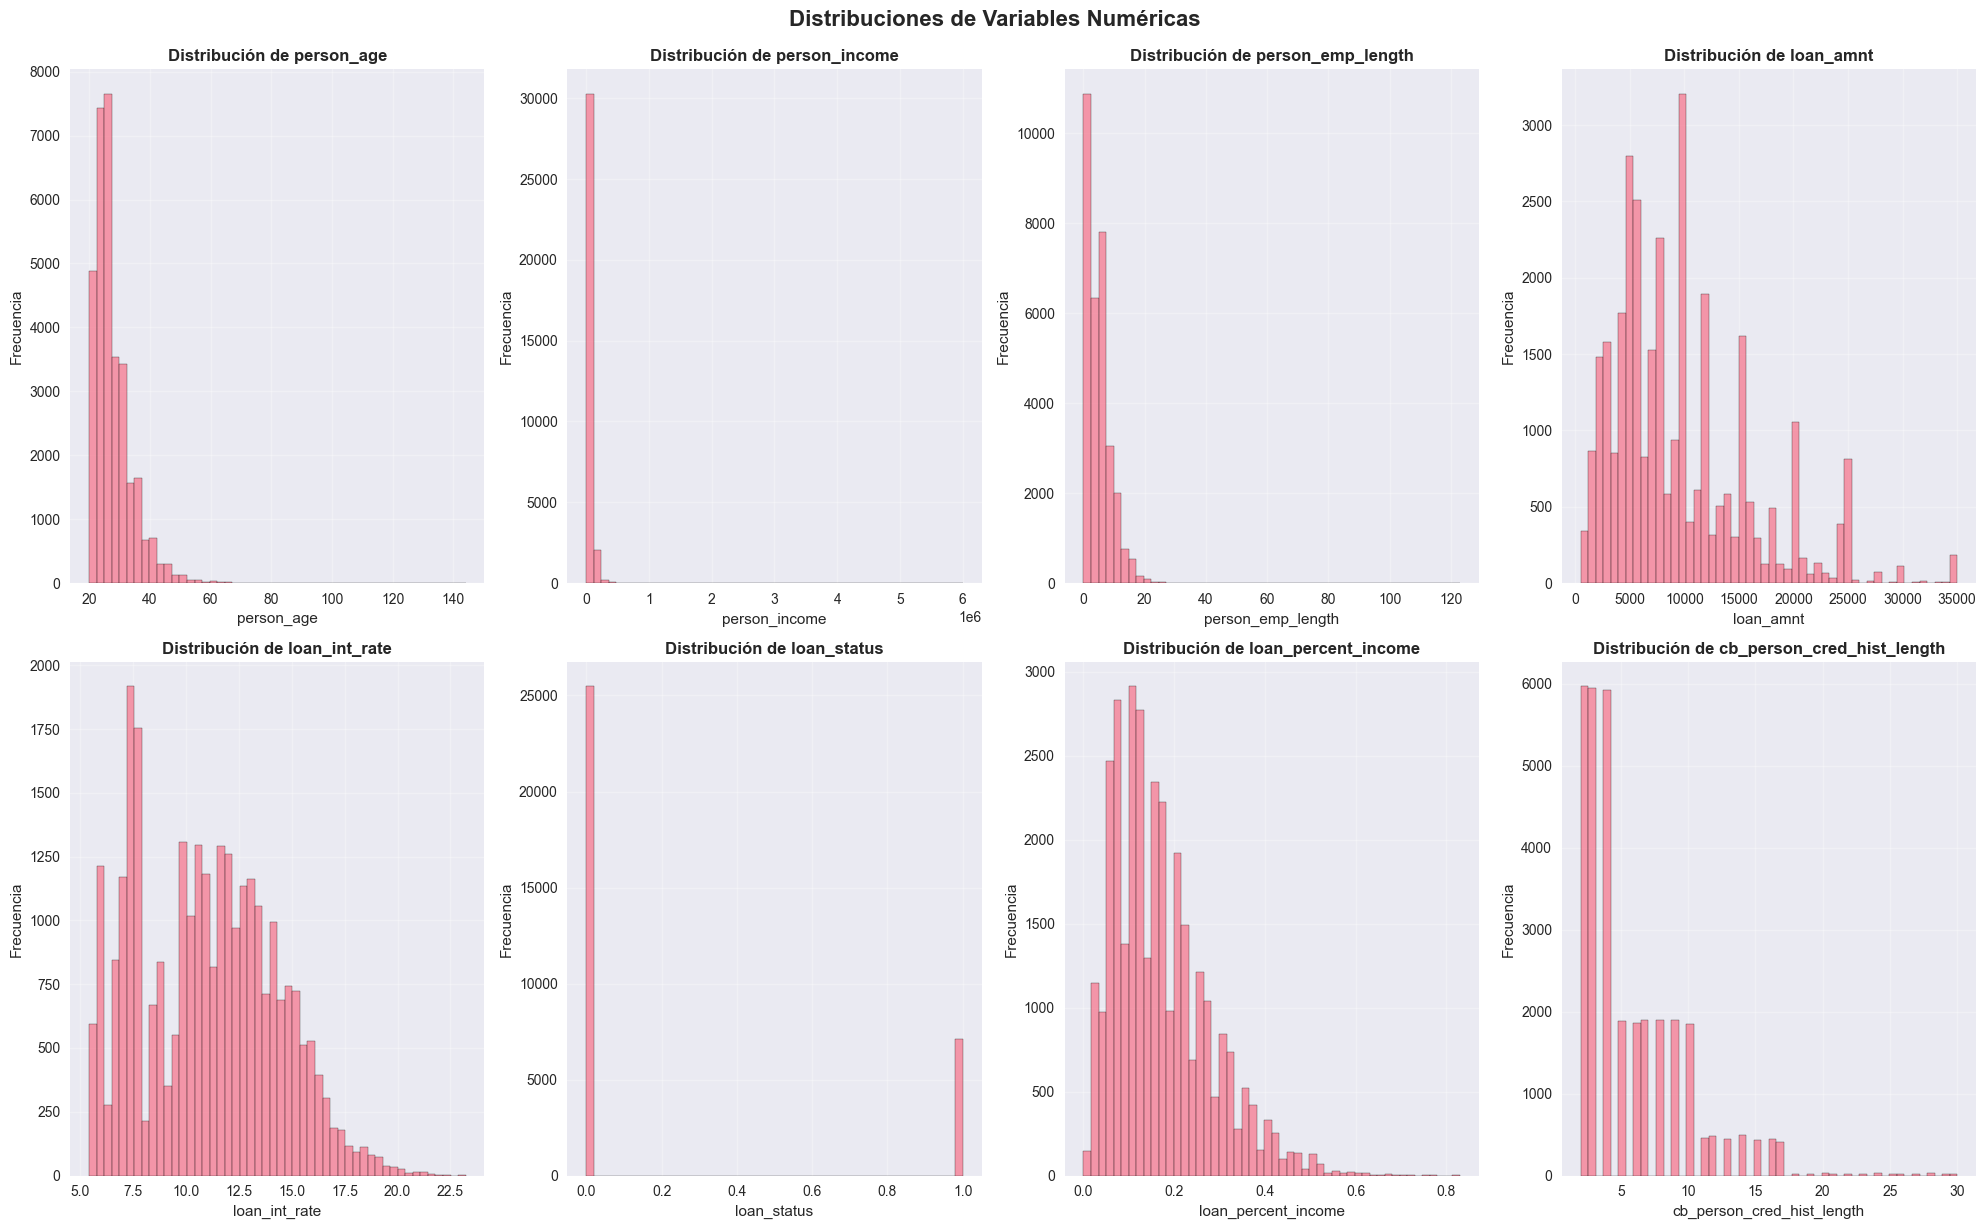

In [ ]:
# Visualizaciones de variables numéricas
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.ravel()

for i, var in enumerate(numeric_vars):
    if i < len(axes):
        # Histograma
        axes[i].hist(df[var].dropna(), bins=50, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribución de {var}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frecuencia')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribuciones de Variables Numéricas', fontsize=16, fontweight='bold', y=1.02)
plt.show()


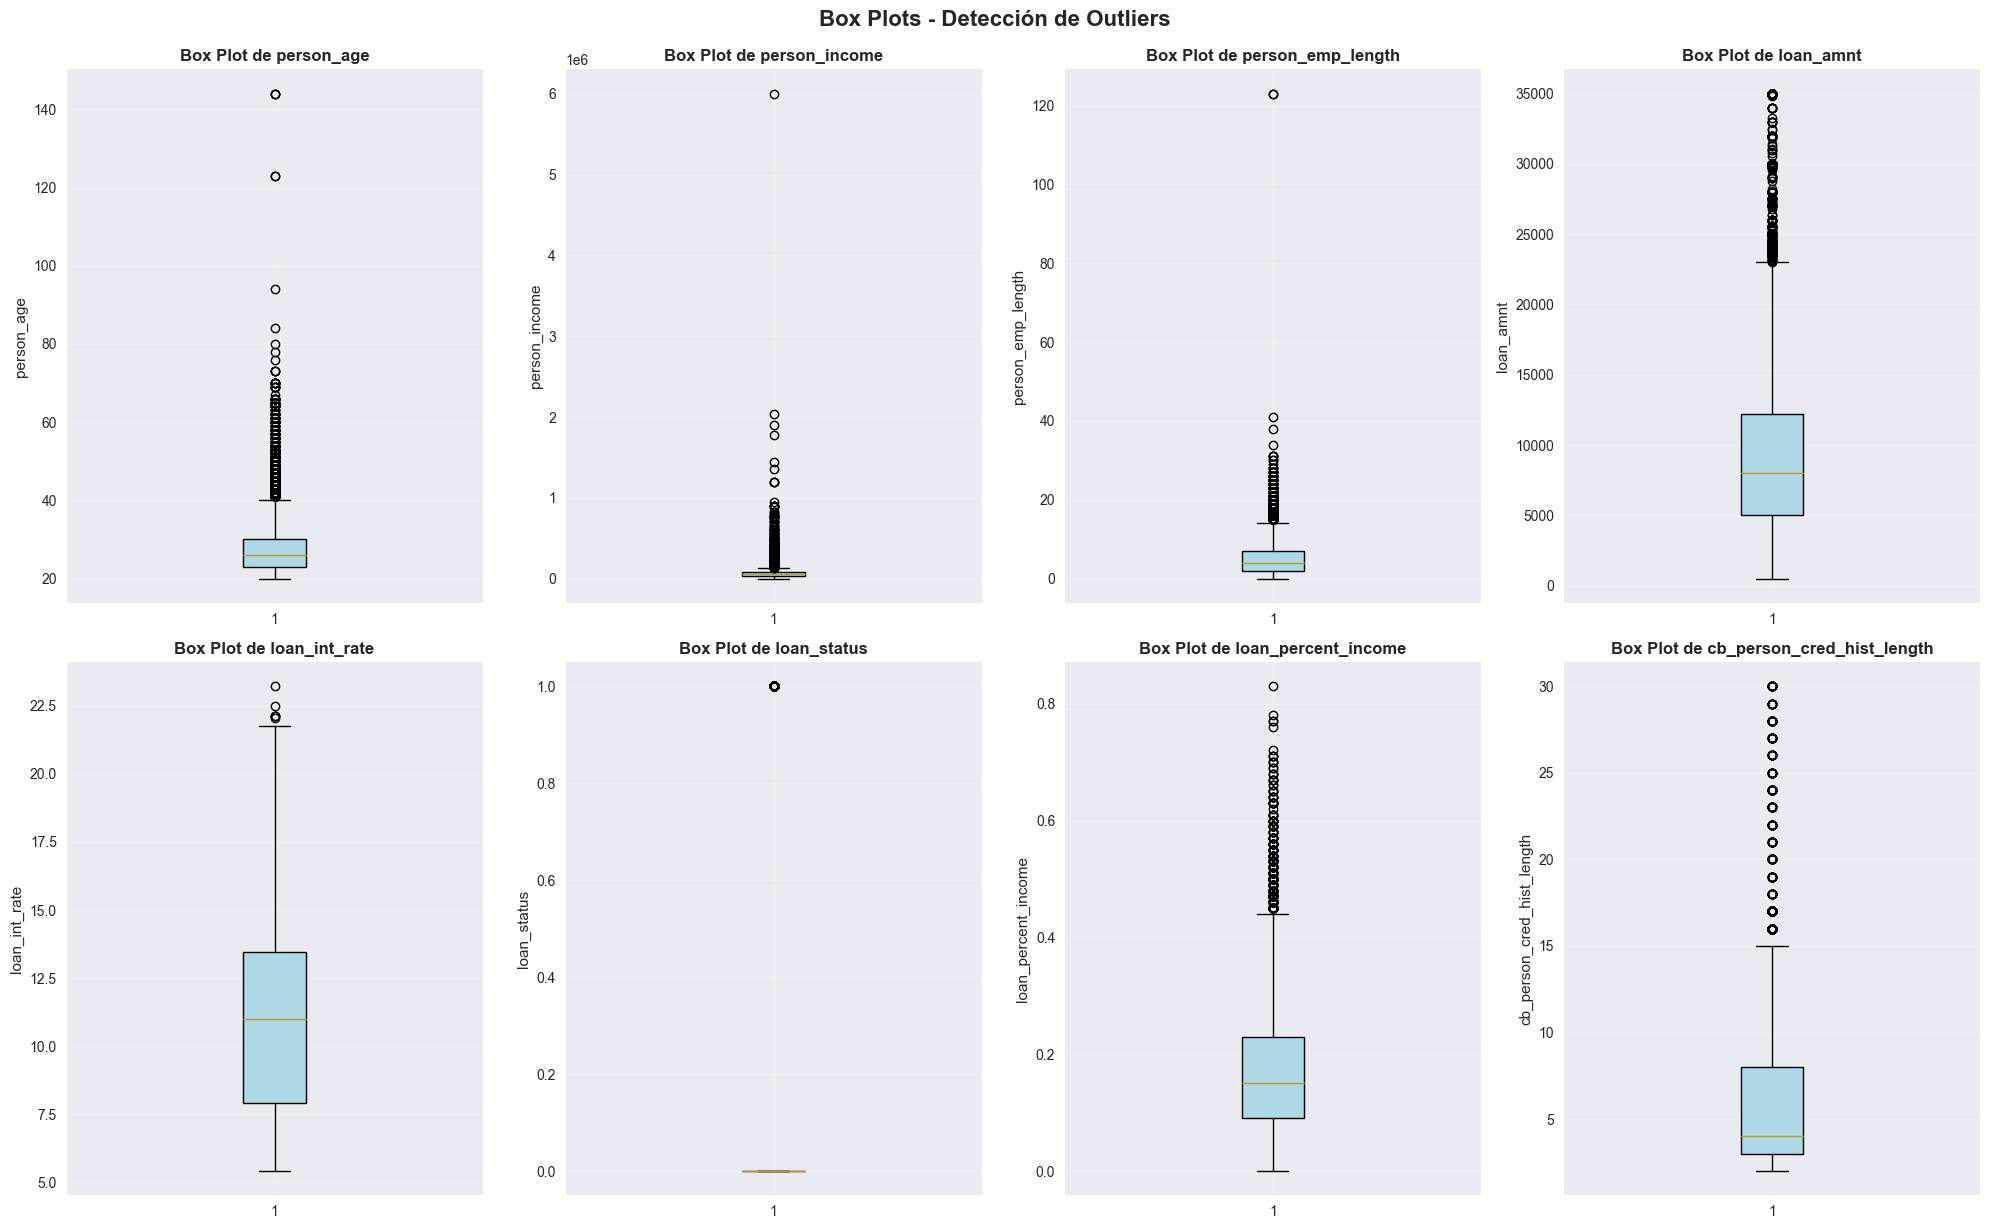

In [ ]:
# Box plots para detectar outliers
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.ravel()

for i, var in enumerate(numeric_vars):
    if i < len(axes):
        # Box plot
        box_plot = axes[i].boxplot(df[var].dropna(), patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightblue')
        axes[i].set_title(f'Box Plot de {var}', fontsize=12, fontweight='bold')
        axes[i].set_ylabel(var)
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Box Plots - Detección de Outliers', fontsize=16, fontweight='bold', y=1.02)
plt.show()


#### 4.2 Análisis de Variables Categóricas


In [ ]:
# Análisis detallado de variables categóricas
print("="*80)
print("ANÁLISIS DETALLADO DE VARIABLES CATEGÓRICAS")
print("="*80)

for var in categorical_vars:
    print(f"\n--- {var.upper()} ---")
    print(f"Tipo: {df[var].dtype}")
    print(f"Valores faltantes: {df[var].isnull().sum()} ({df[var].isnull().sum()/len(df)*100:.2f}%)")
    print(f"Valores únicos: {df[var].nunique()}")
    print(f"Valores más frecuentes:")
    value_counts = df[var].value_counts()
    print(value_counts.head(10))
    print(f"\nDistribución de frecuencias:")
    freq_dist = df[var].value_counts(normalize=True) * 100
    print(freq_dist.head(10))
    print("-" * 50)


ANÁLISIS DETALLADO DE VARIABLES CATEGÓRICAS

--- PERSON_HOME_OWNERSHIP ---
Tipo: object
Valores faltantes: 0 (0.00%)
Valores únicos: 4
Valores más frecuentes:
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

Distribución de frecuencias:
person_home_ownership
RENT        50.477272
MORTGAGE    41.263313
OWN          7.931003
OTHER        0.328412
Name: proportion, dtype: float64
--------------------------------------------------

--- LOAN_INTENT ---
Tipo: object
Valores faltantes: 0 (0.00%)
Valores únicos: 6
Valores más frecuentes:
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

Distribución de frecuencias:
loan_intent
EDUCATION            19.806022
MEDICAL              18.633559
VENTURE              17.553175
PERSONAL             16.945459
DEBTCONSOLIDATION    15.997053
H

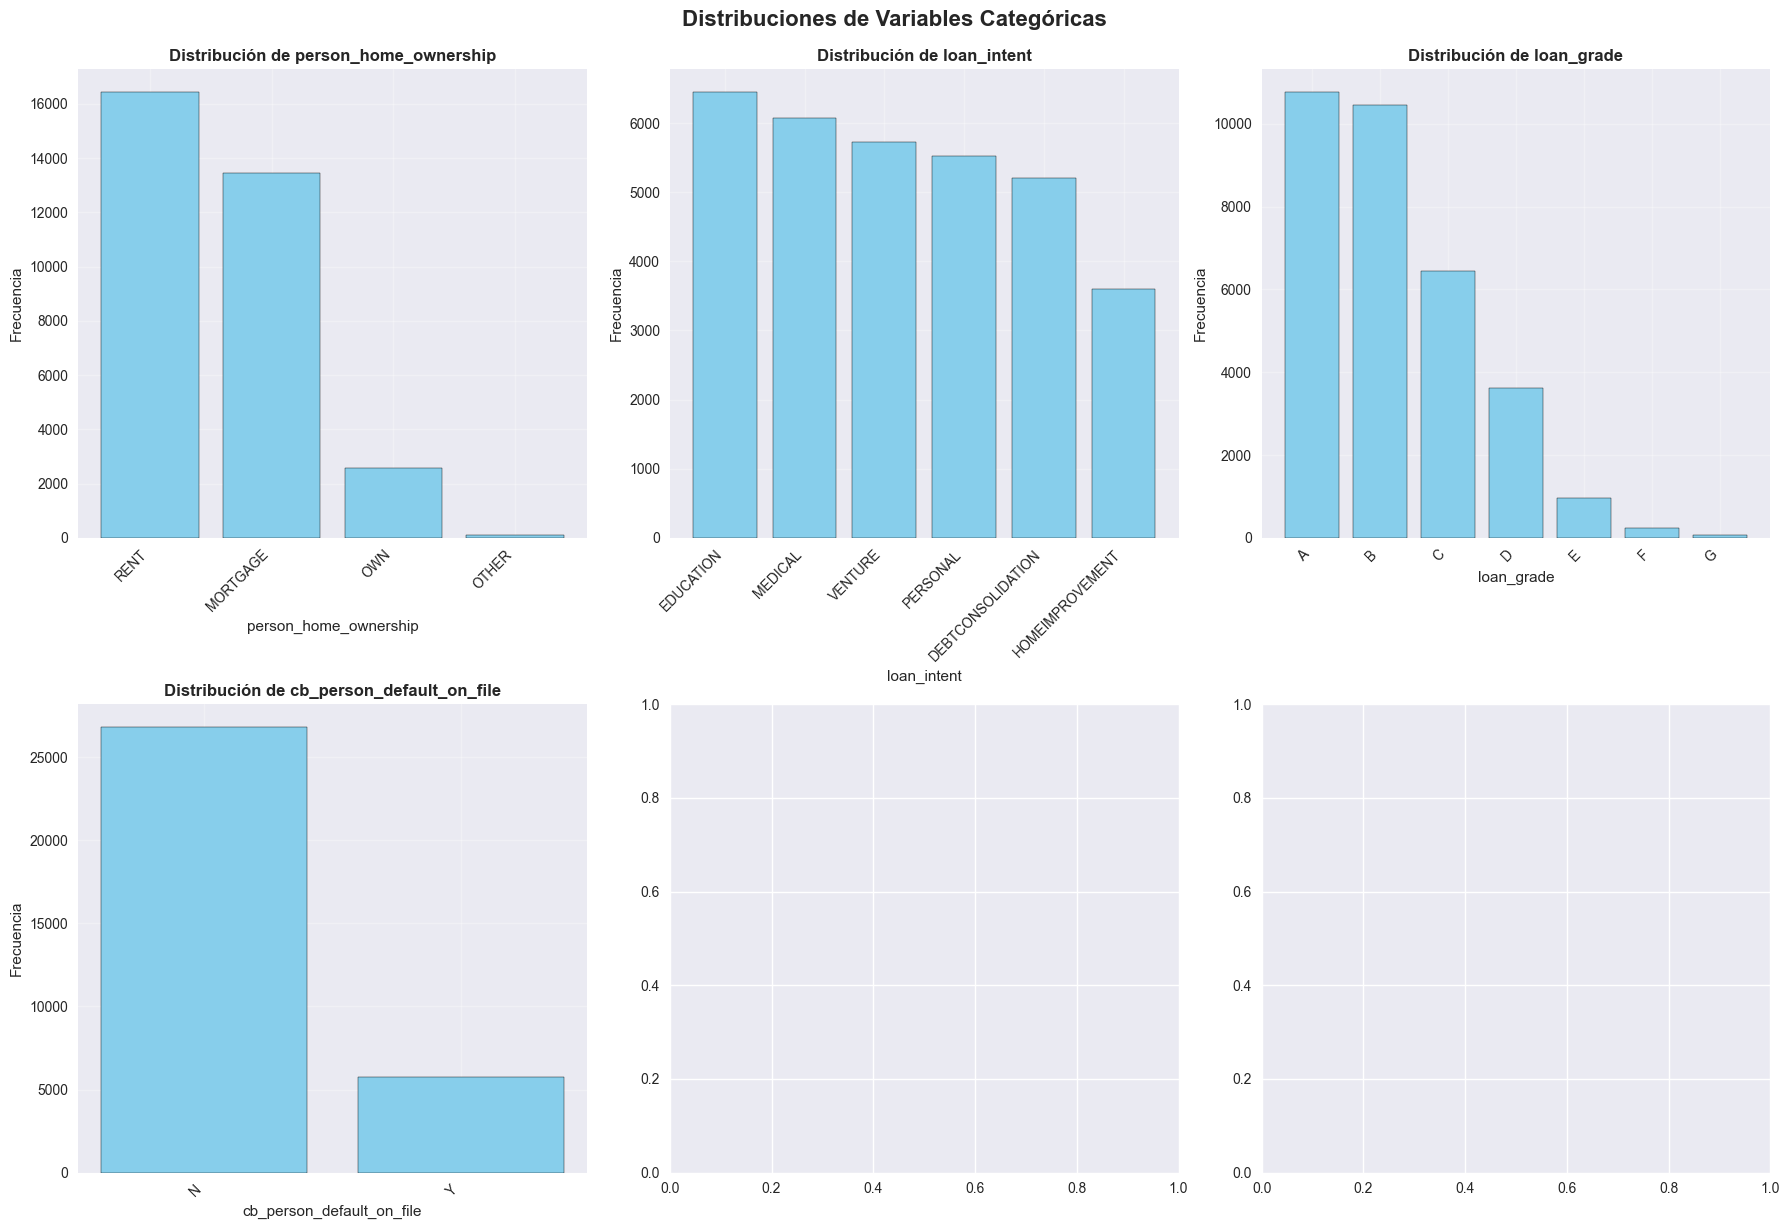

In [ ]:
# Visualizaciones de variables categóricas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(categorical_vars):
    if i < len(axes):
        # Gráfico de barras
        value_counts = df[var].value_counts()
        axes[i].bar(range(len(value_counts)), value_counts.values, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribución de {var}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frecuencia')
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribuciones de Variables Categóricas', fontsize=16, fontweight='bold', y=1.02)
plt.show()


### 5. Análisis Bivariado (Bivariate Analysis)

#### 5.1 Matriz de Correlación


MATRIZ DE CORRELACIÓN
                            person_age  person_income  person_emp_length  \
person_age                    1.000000       0.173202           0.163106   
person_income                 0.173202       1.000000           0.134268   
person_emp_length             0.163106       0.134268           1.000000   
loan_amnt                     0.050787       0.266820           0.113082   
loan_int_rate                 0.012580       0.000792          -0.056405   
loan_status                  -0.021629      -0.144449          -0.082489   
loan_percent_income          -0.042411      -0.254471          -0.054111   
cb_person_cred_hist_length    0.859133       0.117987           0.144699   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.050787       0.012580    -0.021629   
person_income                0.266820       0.000792    -0.144449   
person_emp_length            0.113082      -0.056405    -0.082489   
loan_amnt        

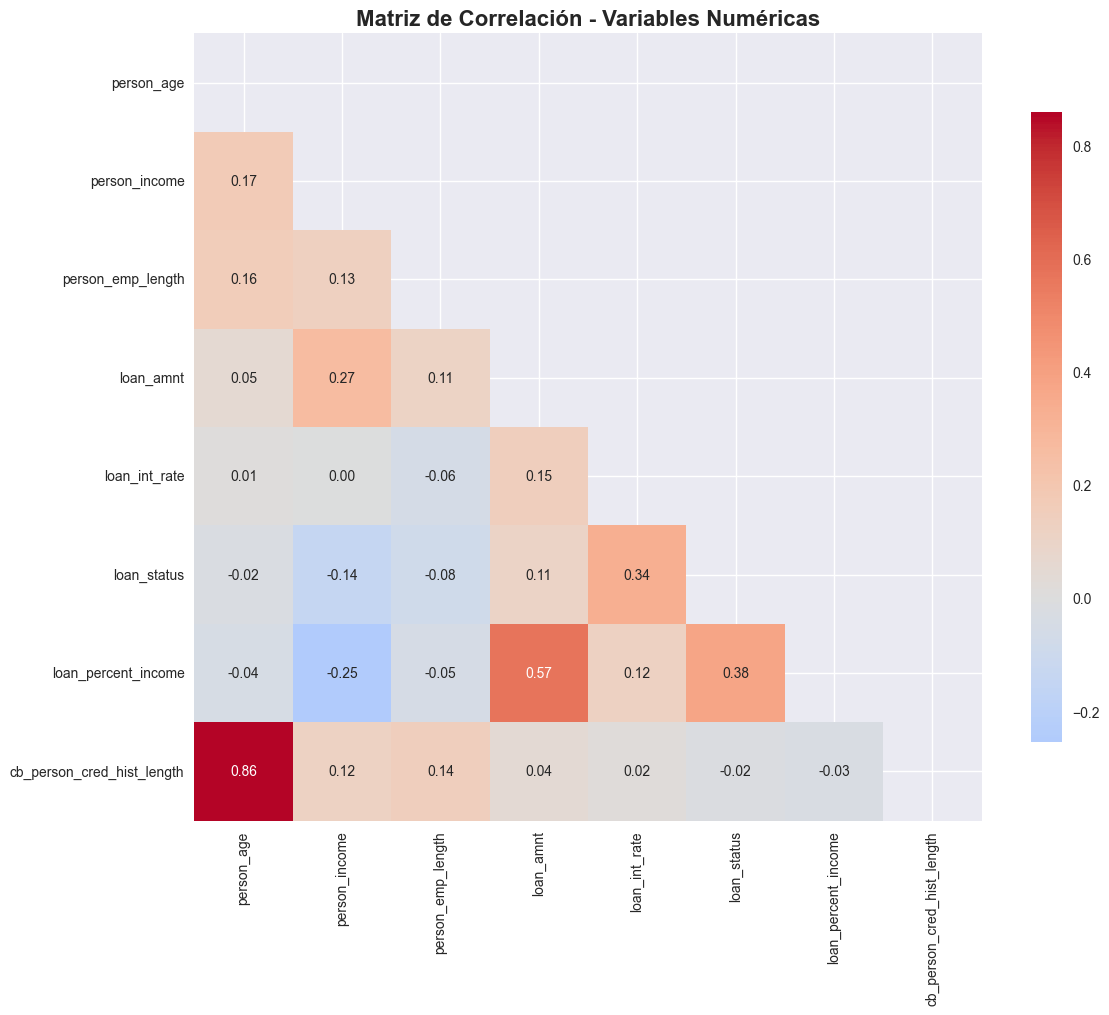

In [ ]:
# Matriz de correlación para variables numéricas
correlation_matrix = df[numeric_vars].corr()

print("="*80)
print("MATRIZ DE CORRELACIÓN")
print("="*80)
print(correlation_matrix)

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


CORRELACIONES CON LA VARIABLE OBJETIVO (loan_status)
loan_percent_income      :  0.379
loan_int_rate            :  0.335
person_income            : -0.144
loan_amnt                :  0.105
person_emp_length        : -0.082
person_age               : -0.022
cb_person_cred_hist_length: -0.016


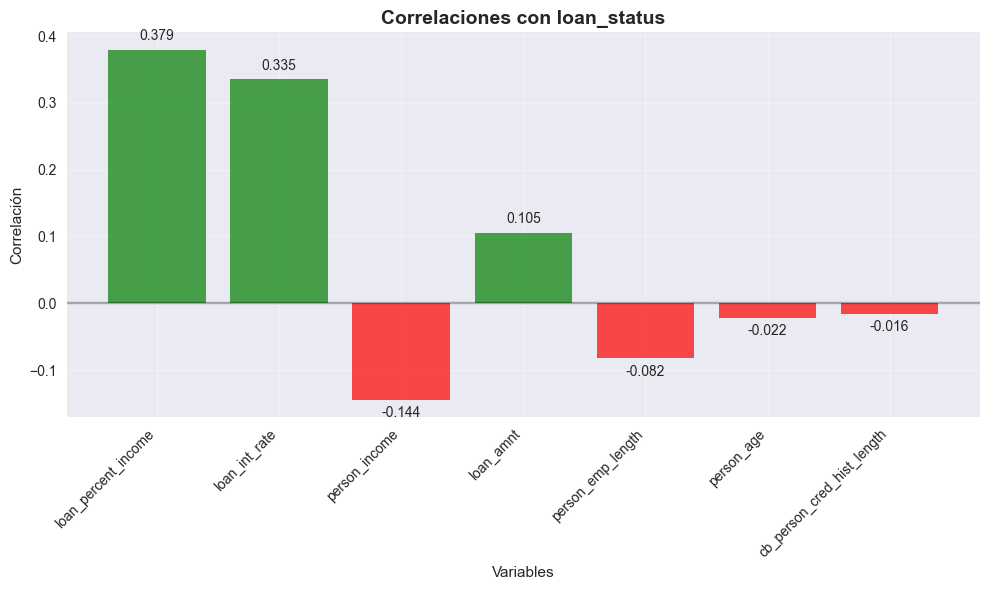

In [ ]:
# Análisis de correlaciones con la variable objetivo
target_correlations = correlation_matrix['loan_status'].drop('loan_status').sort_values(key=abs, ascending=False)

print("="*80)
print("CORRELACIONES CON LA VARIABLE OBJETIVO (loan_status)")
print("="*80)
for var, corr in target_correlations.items():
    print(f"{var:25s}: {corr:6.3f}")

# Visualización de correlaciones con el target
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in target_correlations.values]
bars = plt.bar(range(len(target_correlations)), target_correlations.values, color=colors, alpha=0.7)
plt.title('Correlaciones con loan_status', fontsize=14, fontweight='bold')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.xticks(range(len(target_correlations)), target_correlations.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Agregar valores en las barras
for i, (bar, value) in enumerate(zip(bars, target_correlations.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.01 if value > 0 else -0.01),
             f'{value:.3f}', ha='center', va='bottom' if value > 0 else 'top')

plt.tight_layout()
plt.show()


#### 5.2 Análisis de Variables Categóricas vs Variable Objetivo


In [ ]:
# Análisis de variables categóricas vs loan_status
print("="*80)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS VS LOAN_STATUS")
print("="*80)

for var in categorical_vars:
    if var != 'loan_status':  # Excluir la variable objetivo
        print(f"\n--- {var.upper()} ---")

        # Tabla de contingencia
        contingency_table = pd.crosstab(df[var], df['loan_status'], margins=True)
        print("Tabla de contingencia:")
        print(contingency_table)

        # Porcentajes por fila
        contingency_pct = pd.crosstab(df[var], df['loan_status'], normalize='index') * 100
        print("\nPorcentajes por categoría:")
        print(contingency_pct.round(2))

        # Test de chi-cuadrado
        from scipy.stats import chi2_contingency
        chi2, p_value, dof, expected = chi2_contingency(contingency_table.iloc[:-1, :-1])
        print(f"\nTest de Chi-cuadrado:")
        print(f"Chi2: {chi2:.4f}")
        print(f"P-value: {p_value:.4f}")
        print(f"Grados de libertad: {dof}")
        print(f"Significativo (p<0.05): {'Sí' if p_value < 0.05 else 'No'}")
        print("-" * 60)


ANÁLISIS DE VARIABLES CATEGÓRICAS VS LOAN_STATUS

--- PERSON_HOME_OWNERSHIP ---
Tabla de contingencia:
loan_status                0     1    All
person_home_ownership                    
MORTGAGE               11754  1690  13444
OTHER                     74    33    107
OWN                     2391   193   2584
RENT                   11254  5192  16446
All                    25473  7108  32581

Porcentajes por categoría:
loan_status                0      1
person_home_ownership              
MORTGAGE               87.43  12.57
OTHER                  69.16  30.84
OWN                    92.53   7.47
RENT                   68.43  31.57

Test de Chi-cuadrado:
Chi2: 1907.9807
P-value: 0.0000
Grados de libertad: 3
Significativo (p<0.05): Sí
------------------------------------------------------------

--- LOAN_INTENT ---
Tabla de contingencia:
loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   645

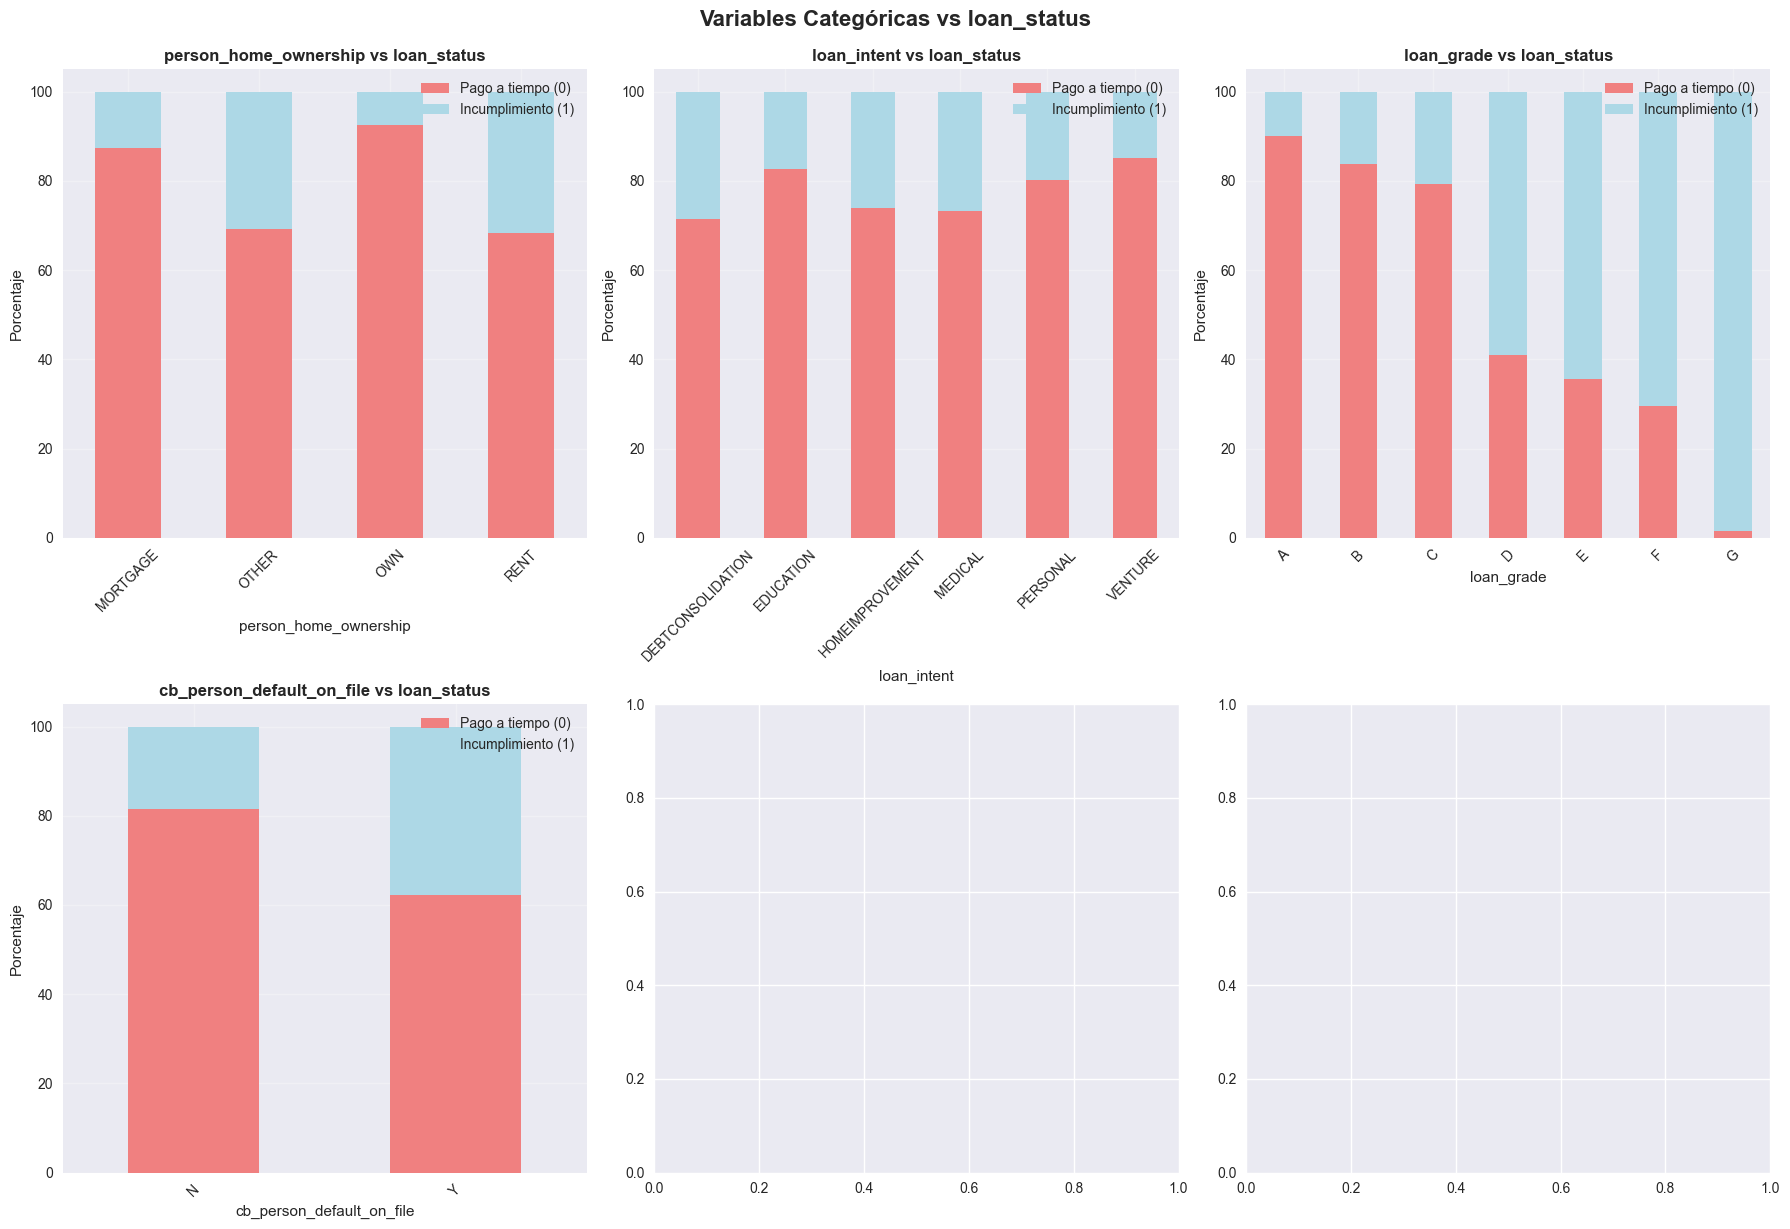

In [ ]:
# Visualizaciones de variables categóricas vs loan_status
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

categorical_vars_no_target = [var for var in categorical_vars if var != 'loan_status']

for i, var in enumerate(categorical_vars_no_target):
    if i < len(axes):
        # Gráfico de barras apiladas
        contingency_pct = pd.crosstab(df[var], df['loan_status'], normalize='index') * 100
        contingency_pct.plot(kind='bar', stacked=True, ax=axes[i], color=['lightcoral', 'lightblue'])
        axes[i].set_title(f'{var} vs loan_status', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Porcentaje')
        axes[i].legend(['Pago a tiempo (0)', 'Incumplimiento (1)'])
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Variables Categóricas vs loan_status', fontsize=16, fontweight='bold', y=1.02)
plt.show()


### 6. Análisis de Valores Faltantes y Outliers

#### 6.1 Análisis Detallado de Valores Faltantes


ANÁLISIS DETALLADO DE VALORES FALTANTES
Resumen de valores faltantes:
            Variable  Valores_Faltantes  Porcentaje
7      loan_int_rate               3116    9.563856
3  person_emp_length                895    2.747000

Registros con al menos un valor faltante: 3943
Registros completamente completos: 28638

Patrones de valores faltantes por pares:
person_emp_length  loan_int_rate
False              False            28638
                   True              3048
True               False              827
                   True                68
Name: count, dtype: int64


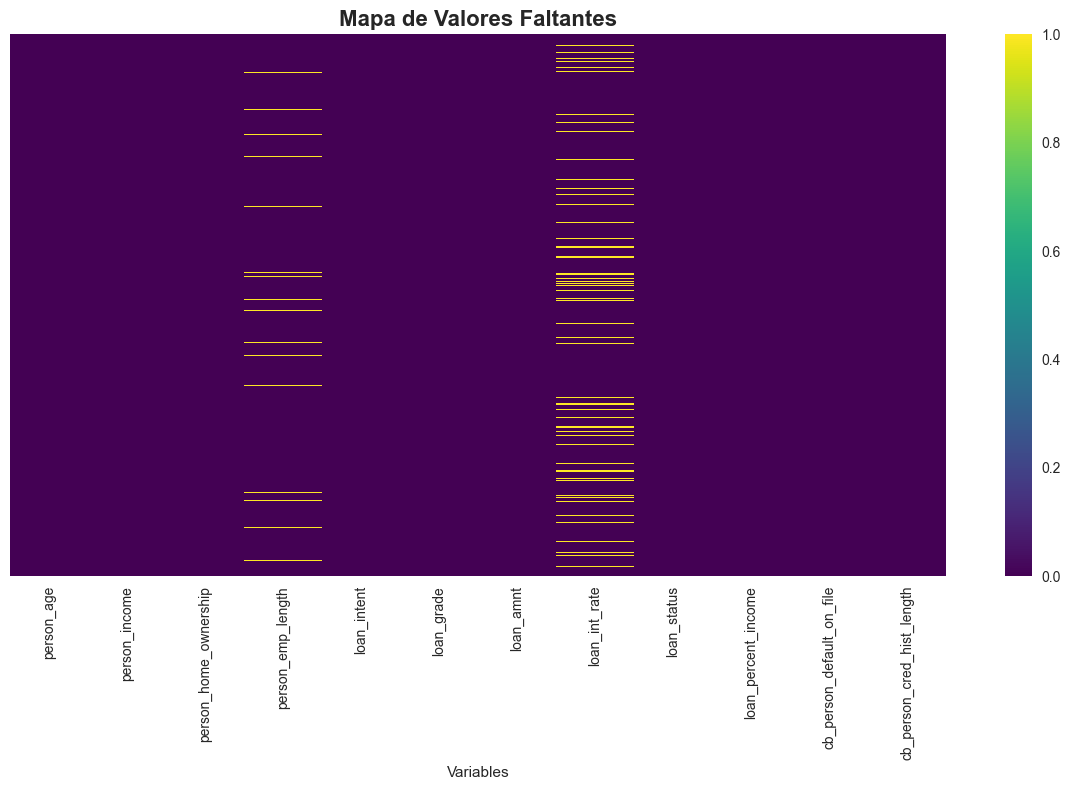

In [ ]:
# Análisis detallado de valores faltantes
print("="*80)
print("ANÁLISIS DETALLADO DE VALORES FALTANTES")
print("="*80)

# Patrones de valores faltantes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_analysis = pd.DataFrame({
    'Variable': missing_data.index,
    'Valores_Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
}).sort_values('Valores_Faltantes', ascending=False)

print("Resumen de valores faltantes:")
print(missing_analysis[missing_analysis['Valores_Faltantes'] > 0])

# Análisis de patrones de valores faltantes
print(f"\nRegistros con al menos un valor faltante: {df.isnull().any(axis=1).sum()}")
print(f"Registros completamente completos: {df.notnull().all(axis=1).sum()}")

# Patrones de valores faltantes por pares de variables
print("\nPatrones de valores faltantes por pares:")
missing_patterns = df[['person_emp_length', 'loan_int_rate']].isnull()
pattern_counts = missing_patterns.value_counts()
print(pattern_counts)

# Visualización de valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Mapa de Valores Faltantes', fontsize=16, fontweight='bold')
plt.xlabel('Variables')
plt.tight_layout()
plt.show()


#### 6.2 Análisis de Outliers


In [ ]:
# Análisis detallado de outliers
print("="*80)
print("ANÁLISIS DETALLADO DE OUTLIERS")
print("="*80)

outlier_summary = []

for var in numeric_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100

    outlier_summary.append({
        'Variable': var,
        'Outliers_IQR': outlier_count,
        'Porcentaje': outlier_percent,
        'Limite_Inferior': lower_bound,
        'Limite_Superior': upper_bound,
        'Valor_Min': df[var].min(),
        'Valor_Max': df[var].max()
    })

    print(f"\n{var}:")
    print(f"  Outliers (IQR): {outlier_count} ({outlier_percent:.2f}%)")
    print(f"  Límites: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Rango real: [{df[var].min():.2f}, {df[var].max():.2f}]")

outlier_df = pd.DataFrame(outlier_summary)
print(f"\nResumen de outliers:")
print(outlier_df[['Variable', 'Outliers_IQR', 'Porcentaje']].sort_values('Outliers_IQR', ascending=False))


ANÁLISIS DETALLADO DE OUTLIERS

person_age:
  Outliers (IQR): 1494 (4.59%)
  Límites: [12.50, 40.50]
  Rango real: [20.00, 144.00]

person_income:
  Outliers (IQR): 1484 (4.55%)
  Límites: [-22550.00, 140250.00]
  Rango real: [4000.00, 6000000.00]

person_emp_length:
  Outliers (IQR): 853 (2.62%)
  Límites: [-5.50, 14.50]
  Rango real: [0.00, 123.00]

loan_amnt:
  Outliers (IQR): 1689 (5.18%)
  Límites: [-5800.00, 23000.00]
  Rango real: [500.00, 35000.00]

loan_int_rate:
  Outliers (IQR): 6 (0.02%)
  Límites: [-0.46, 21.83]
  Rango real: [5.42, 23.22]

loan_status:
  Outliers (IQR): 7108 (21.82%)
  Límites: [0.00, 0.00]
  Rango real: [0.00, 1.00]

loan_percent_income:
  Outliers (IQR): 651 (2.00%)
  Límites: [-0.12, 0.44]
  Rango real: [0.00, 0.83]

cb_person_cred_hist_length:
  Outliers (IQR): 1142 (3.51%)
  Límites: [-4.50, 15.50]
  Rango real: [2.00, 30.00]

Resumen de outliers:
                     Variable  Outliers_IQR  Porcentaje
5                 loan_status          7108   21

In [ ]:
# Eliminación de outliers - Continuación del análisis anterior
print("\n" + "="*80)
print("ELIMINACIÓN DE OUTLIERS")
print("="*80)

# Definir variables numéricas (excluyendo la variable objetivo para el análisis)
numeric_vars_no_target = [var for var in numeric_vars if var != 'loan_status']

# Guardar el dataset original para comparación
df_original = df.copy()
print(f"Dataset original: {len(df_original):,} registros")

outliers_to_remove = set()

# Identificar outliers usando el método IQR para todas las variables numéricas
print(f"\nIdentificando outliers en {len(numeric_vars_no_target)} variables numéricas...")

for var in numeric_vars_no_target:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar índices de outliers para esta variable
    outlier_indices = df[(df[var] < lower_bound) | (df[var] > upper_bound)].index
    outliers_to_remove.update(outlier_indices)

    outlier_count = len(outlier_indices)
    print(f"  {var}: {outlier_count:,} outliers ({outlier_count/len(df)*100:.2f}%)")

print(f"\nTotal de registros únicos con outliers: {len(outliers_to_remove):,}")
print(f"Porcentaje de registros con outliers: {len(outliers_to_remove)/len(df)*100:.2f}%")

# Crear dataset sin outliers
df_no_outliers = df.drop(index=outliers_to_remove).reset_index(drop=True)

print(f"\nDataset después de eliminar outliers: {len(df_no_outliers):,} registros")
print(f"Registros eliminados: {len(df) - len(df_no_outliers):,}")
print(f"Porcentaje de registros eliminados: {(len(df) - len(df_no_outliers))/len(df)*100:.2f}%")

# Análisis del impacto en la variable objetivo
print(f"\n" + "="*80)
print("IMPACTO EN LA VARIABLE OBJETIVO")
print("="*80)

print("ANTES de eliminar outliers:")
target_dist_original = df_original['loan_status'].value_counts()
target_pct_original = df_original['loan_status'].value_counts(normalize=True) * 100
for status, count in target_dist_original.items():
    status_name = "Pago a tiempo" if status == 0 else "Incumplimiento"
    print(f"  {status_name} ({status}): {count:,} ({target_pct_original[status]:.2f}%)")

print(f"\nDESPUÉS de eliminar outliers:")
target_dist_clean = df_no_outliers['loan_status'].value_counts()
target_pct_clean = df_no_outliers['loan_status'].value_counts(normalize=True) * 100
for status, count in target_dist_clean.items():
    status_name = "Pago a tiempo" if status == 0 else "Incumplimiento"
    print(f"  {status_name} ({status}): {count:,} ({target_pct_clean[status]:.2f}%)")

# Calcular cambio en el balance de clases
imbalance_original = target_dist_original[1] / target_dist_original[0]
imbalance_clean = target_dist_clean[1] / target_dist_clean[0]
print(f"\nRatio de desbalance:")
print(f"  Original: {imbalance_original:.3f}")
print(f"  Sin outliers: {imbalance_clean:.3f}")
print(f"  Cambio: {((imbalance_clean - imbalance_original) / imbalance_original * 100):+.2f}%")

# Actualizar el dataset principal
df = df_no_outliers.copy()
print(f"\nDataset actualizado con {len(df):,} registros (sin outliers)")
print("✓ El dataset 'df' ahora contiene los datos limpios sin outliers")



ELIMINACIÓN DE OUTLIERS
Dataset original: 32,581 registros

Identificando outliers en 7 variables numéricas...
  person_age: 1,494 outliers (4.59%)
  person_income: 1,484 outliers (4.55%)
  person_emp_length: 853 outliers (2.62%)
  loan_amnt: 1,689 outliers (5.18%)
  loan_int_rate: 6 outliers (0.02%)
  loan_percent_income: 651 outliers (2.00%)
  cb_person_cred_hist_length: 1,142 outliers (3.51%)

Total de registros únicos con outliers: 5,557
Porcentaje de registros con outliers: 17.06%

Dataset después de eliminar outliers: 27,024 registros
Registros eliminados: 5,557
Porcentaje de registros eliminados: 17.06%

IMPACTO EN LA VARIABLE OBJETIVO
ANTES de eliminar outliers:
  Pago a tiempo (0): 25,473 (78.18%)
  Incumplimiento (1): 7,108 (21.82%)

DESPUÉS de eliminar outliers:
  Pago a tiempo (0): 21,410 (79.23%)
  Incumplimiento (1): 5,614 (20.77%)

Ratio de desbalance:
  Original: 0.279
  Sin outliers: 0.262
  Cambio: -6.03%

Dataset actualizado con 27,024 registros (sin outliers)
✓ El 

VISUALIZACIÓN: COMPARACIÓN ANTES VS DESPUÉS DE ELIMINAR OUTLIERS


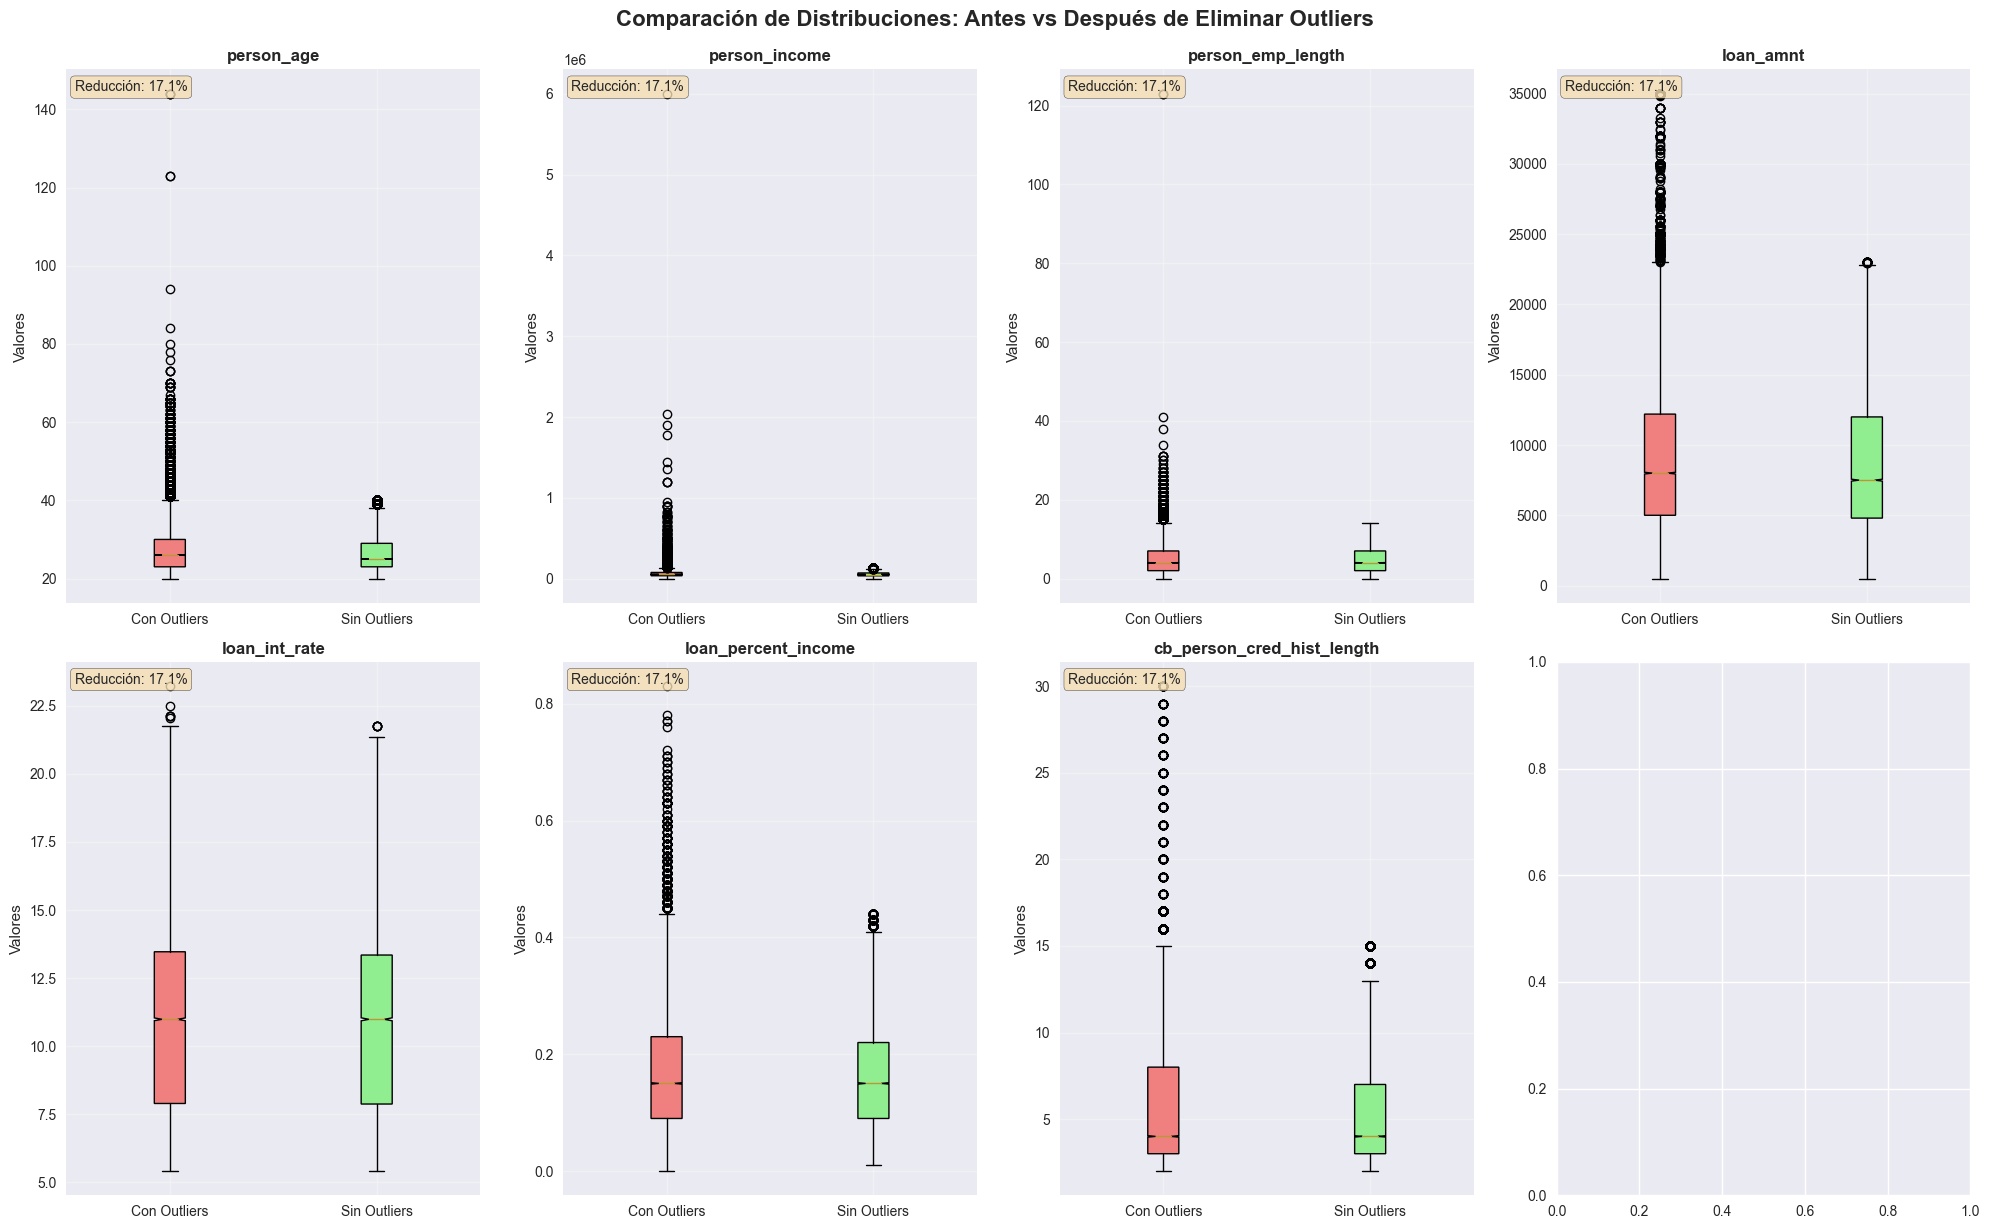


IMPACTO VISUAL EN LA VARIABLE OBJETIVO


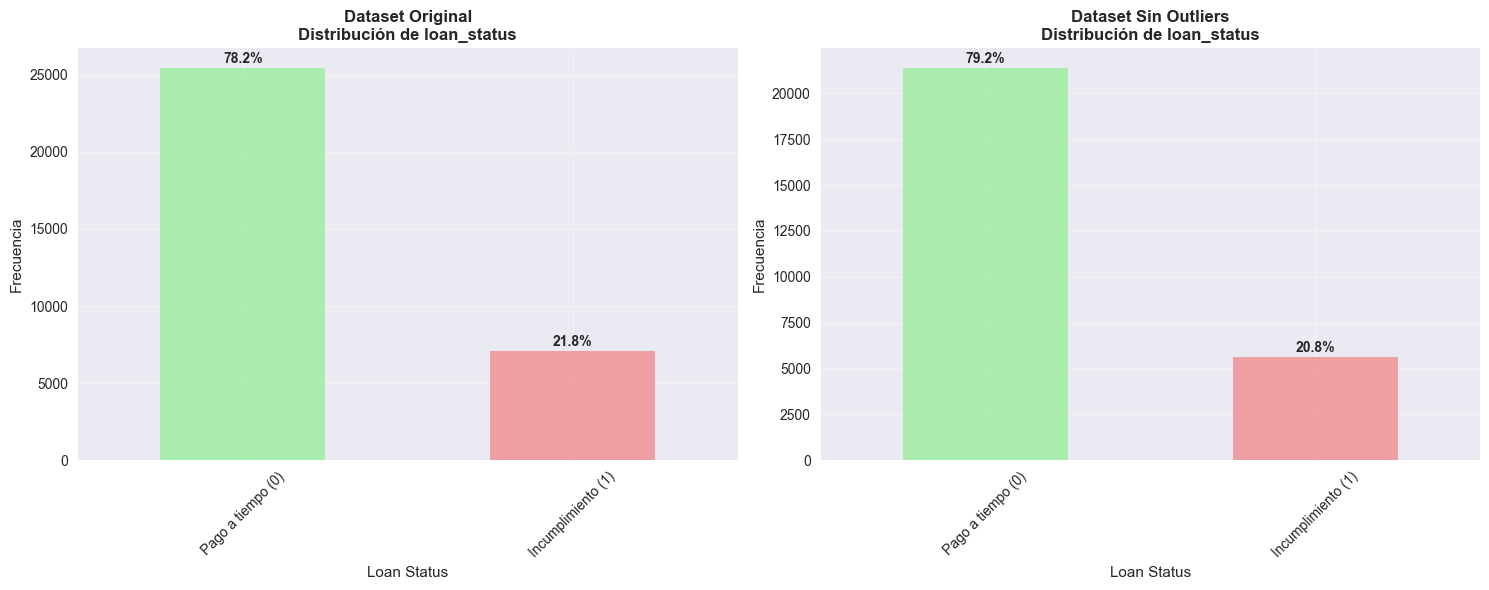


ESTADÍSTICAS DESCRIPTIVAS COMPARATIVAS
RESUMEN DE CAMBIOS:
  • Registros originales: 32,581
  • Registros después de limpieza: 27,024
  • Registros eliminados: 5,557
  • Porcentaje eliminado: 17.06%

COMPARACIÓN ESTADÍSTICA POR VARIABLE:
--------------------------------------------------------------------------------

person_age:
  Media:      27.73 → 26.38 (-4.87%)
  Desv. Est.: 6.35 → 4.22 (-33.55%)

person_income:
  Media:      66074.85 → 57535.37 (-12.92%)
  Desv. Est.: 61983.12 → 26676.41 (-56.96%)

person_emp_length:
  Media:      4.79 → 4.35 (-9.11%)
  Desv. Est.: 4.14 → 3.38 (-18.44%)

loan_amnt:
  Media:      9589.37 → 8418.80 (-12.21%)
  Desv. Est.: 6322.09 → 4868.61 (-22.99%)

loan_int_rate:
  Media:      11.01 → 10.92 (-0.84%)
  Desv. Est.: 3.24 → 3.20 (-1.16%)

loan_percent_income:
  Media:      0.17 → 0.16 (-4.45%)
  Desv. Est.: 0.11 → 0.09 (-12.75%)

cb_person_cred_hist_length:
  Media:      5.80 → 5.00 (-13.83%)
  Desv. Est.: 4.06 → 2.97 (-26.70%)


In [ ]:
# Visualización de la comparación antes y después de eliminar outliers
print("="*80)
print("VISUALIZACIÓN: COMPARACIÓN ANTES VS DESPUÉS DE ELIMINAR OUTLIERS")
print("="*80)

# Crear subplots para comparar distribuciones
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.ravel()

for i, var in enumerate(numeric_vars_no_target):
    if i < len(axes):
        # Box plot comparativo
        ax = axes[i]

        # Crear datos para boxplot
        data_original = df_original[var].dropna()
        data_clean = df[var].dropna()

        # Box plot lado a lado
        bp = ax.boxplot([data_original, data_clean],
                       labels=['Con Outliers', 'Sin Outliers'],
                       patch_artist=True,
                       notch=True)

        # Colorear las cajas
        bp['boxes'][0].set_facecolor('lightcoral')
        bp['boxes'][1].set_facecolor('lightgreen')

        ax.set_title(f'{var}', fontweight='bold', fontsize=12)
        ax.set_ylabel('Valores')
        ax.grid(True, alpha=0.3)

        # Agregar información estadística
        reduction_pct = ((len(df_original) - len(df)) / len(df_original)) * 100
        ax.text(0.02, 0.98, f'Reducción: {reduction_pct:.1f}%',
                transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.suptitle('Comparación de Distribuciones: Antes vs Después de Eliminar Outliers',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Gráfico comparativo de la variable objetivo
print("\n" + "="*80)
print("IMPACTO VISUAL EN LA VARIABLE OBJETIVO")
print("="*80)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Distribución original
target_dist_original.plot(kind='bar', ax=ax1, color=['lightgreen', 'lightcoral'], alpha=0.7)
ax1.set_title('Dataset Original\nDistribución de loan_status', fontweight='bold')
ax1.set_xlabel('Loan Status')
ax1.set_ylabel('Frecuencia')
ax1.set_xticklabels(['Pago a tiempo (0)', 'Incumplimiento (1)'], rotation=45)
ax1.grid(True, alpha=0.3)

# Agregar porcentajes
for i, v in enumerate(target_dist_original.values):
    ax1.text(i, v + 100, f'{target_pct_original.iloc[i]:.1f}%',
             ha='center', va='bottom', fontweight='bold')

# Distribución sin outliers
target_dist_clean.plot(kind='bar', ax=ax2, color=['lightgreen', 'lightcoral'], alpha=0.7)
ax2.set_title('Dataset Sin Outliers\nDistribución de loan_status', fontweight='bold')
ax2.set_xlabel('Loan Status')
ax2.set_ylabel('Frecuencia')
ax2.set_xticklabels(['Pago a tiempo (0)', 'Incumplimiento (1)'], rotation=45)
ax2.grid(True, alpha=0.3)

# Agregar porcentajes
for i, v in enumerate(target_dist_clean.values):
    ax2.text(i, v + 100, f'{target_pct_clean.iloc[i]:.1f}%',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Estadísticas descriptivas comparativas
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS COMPARATIVAS")
print("="*80)

print("RESUMEN DE CAMBIOS:")
print(f"  • Registros originales: {len(df_original):,}")
print(f"  • Registros después de limpieza: {len(df):,}")
print(f"  • Registros eliminados: {len(df_original) - len(df):,}")
print(f"  • Porcentaje eliminado: {((len(df_original) - len(df)) / len(df_original) * 100):.2f}%")

print(f"\nCOMPARACIÓN ESTADÍSTICA POR VARIABLE:")
print("-" * 80)

for var in numeric_vars_no_target:
    orig_mean = df_original[var].mean()
    clean_mean = df[var].mean()
    orig_std = df_original[var].std()
    clean_std = df[var].std()

    print(f"\n{var}:")
    print(f"  Media:      {orig_mean:.2f} → {clean_mean:.2f} ({((clean_mean - orig_mean) / orig_mean * 100):+.2f}%)")
    print(f"  Desv. Est.: {orig_std:.2f} → {clean_std:.2f} ({((clean_std - orig_std) / orig_std * 100):+.2f}%)")


### 7. Análisis de la Variable Objetivo (Target Analysis)

#### 7.1 Distribución de loan_status


ANÁLISIS DE LA VARIABLE OBJETIVO (loan_status)
Distribución de loan_status:
0 (Pago a tiempo): 21,410 (79.23%)
1 (Incumplimiento): 5,614 (20.77%)
Total: 27,024 (100.00%)

Ratio de desbalance: 0.262
Clase minoritaria: Incumplimiento (1)


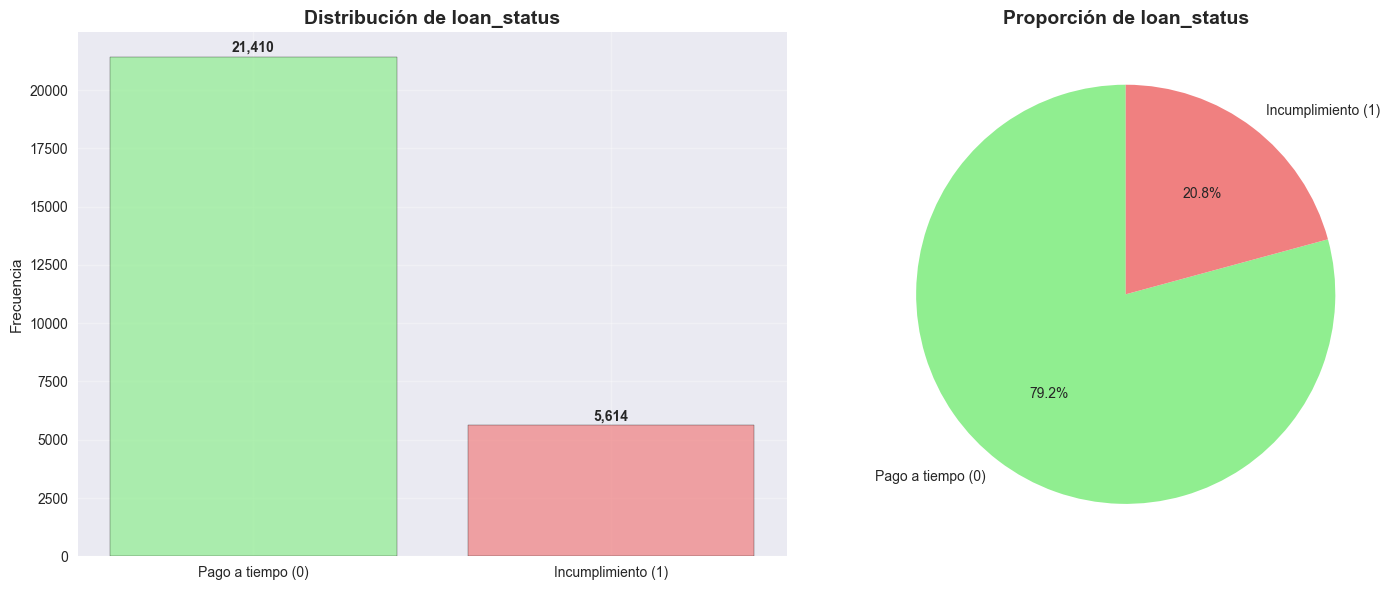

In [ ]:
# Análisis detallado de la variable objetivo
print("="*80)
print("ANÁLISIS DE LA VARIABLE OBJETIVO (loan_status)")
print("="*80)

# Distribución de loan_status
target_distribution = df['loan_status'].value_counts()
target_percentages = df['loan_status'].value_counts(normalize=True) * 100

print("Distribución de loan_status:")
print(f"0 (Pago a tiempo): {target_distribution[0]:,} ({target_percentages[0]:.2f}%)")
print(f"1 (Incumplimiento): {target_distribution[1]:,} ({target_percentages[1]:.2f}%)")
print(f"Total: {len(df):,} (100.00%)")

# Verificar balance de clases
imbalance_ratio = target_distribution[1] / target_distribution[0]
print(f"\nRatio de desbalance: {imbalance_ratio:.3f}")
print(f"Clase minoritaria: {'Incumplimiento (1)' if target_distribution[1] < target_distribution[0] else 'Pago a tiempo (0)'}")

# Visualización de la distribución del target
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
bars = ax1.bar(['Pago a tiempo (0)', 'Incumplimiento (1)'], target_distribution.values,
               color=['lightgreen', 'lightcoral'], edgecolor='black', alpha=0.7)
ax1.set_title('Distribución de loan_status', fontsize=14, fontweight='bold')
ax1.set_ylabel('Frecuencia')
ax1.grid(True, alpha=0.3)

# Agregar valores en las barras
for bar, value in zip(bars, target_distribution.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
             f'{value:,}', ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
ax2.pie(target_distribution.values, labels=['Pago a tiempo (0)', 'Incumplimiento (1)'],
        autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
ax2.set_title('Proporción de loan_status', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


#### 7.2 Análisis de Características por Clase


In [ ]:
# Análisis de características por clase
print("="*80)
print("ANÁLISIS DE CARACTERÍSTICAS POR CLASE")
print("="*80)

# Estadísticas descriptivas por clase
print("Estadísticas descriptivas por clase (variables numéricas):")
print("-" * 60)

for var in numeric_vars:
    if var != 'loan_status':
        print(f"\n{var.upper()}:")
        stats_by_class = df.groupby('loan_status')[var].describe()
        print(stats_by_class)

        # Test t para comparar medias
        from scipy.stats import ttest_ind
        class_0 = df[df['loan_status'] == 0][var].dropna()
        class_1 = df[df['loan_status'] == 1][var].dropna()

        if len(class_0) > 0 and len(class_1) > 0:
            t_stat, p_value = ttest_ind(class_0, class_1)
            print(f"Test t: t={t_stat:.4f}, p={p_value:.4f}")
            print(f"Significativo (p<0.05): {'Sí' if p_value < 0.05 else 'No'}")
        print("-" * 40)


ANÁLISIS DE CARACTERÍSTICAS POR CLASE
Estadísticas descriptivas por clase (variables numéricas):
------------------------------------------------------------

PERSON_AGE:
               count       mean       std   min   25%   50%   75%   max
loan_status                                                            
0            21410.0  26.437926  4.216811  20.0  23.0  25.0  29.0  40.0
1             5614.0  26.173851  4.218053  20.0  23.0  25.0  28.0  40.0
Test t: t=4.1763, p=0.0000
Significativo (p<0.05): Sí
----------------------------------------

PERSON_INCOME:
               count          mean           std     min      25%      50%  \
loan_status                                                                  
0            21410.0  61165.891733  26517.358721  7000.0  40800.0  56400.0   
1             5614.0  43689.732989  22405.719919  4080.0  29004.0  39000.0   

                 75%       max  
loan_status                     
0            76000.0  140004.0  
1            55000

### 8. Visualizaciones Avanzadas y Patrones

#### 8.1 Scatter Plots y Relaciones Multivariadas


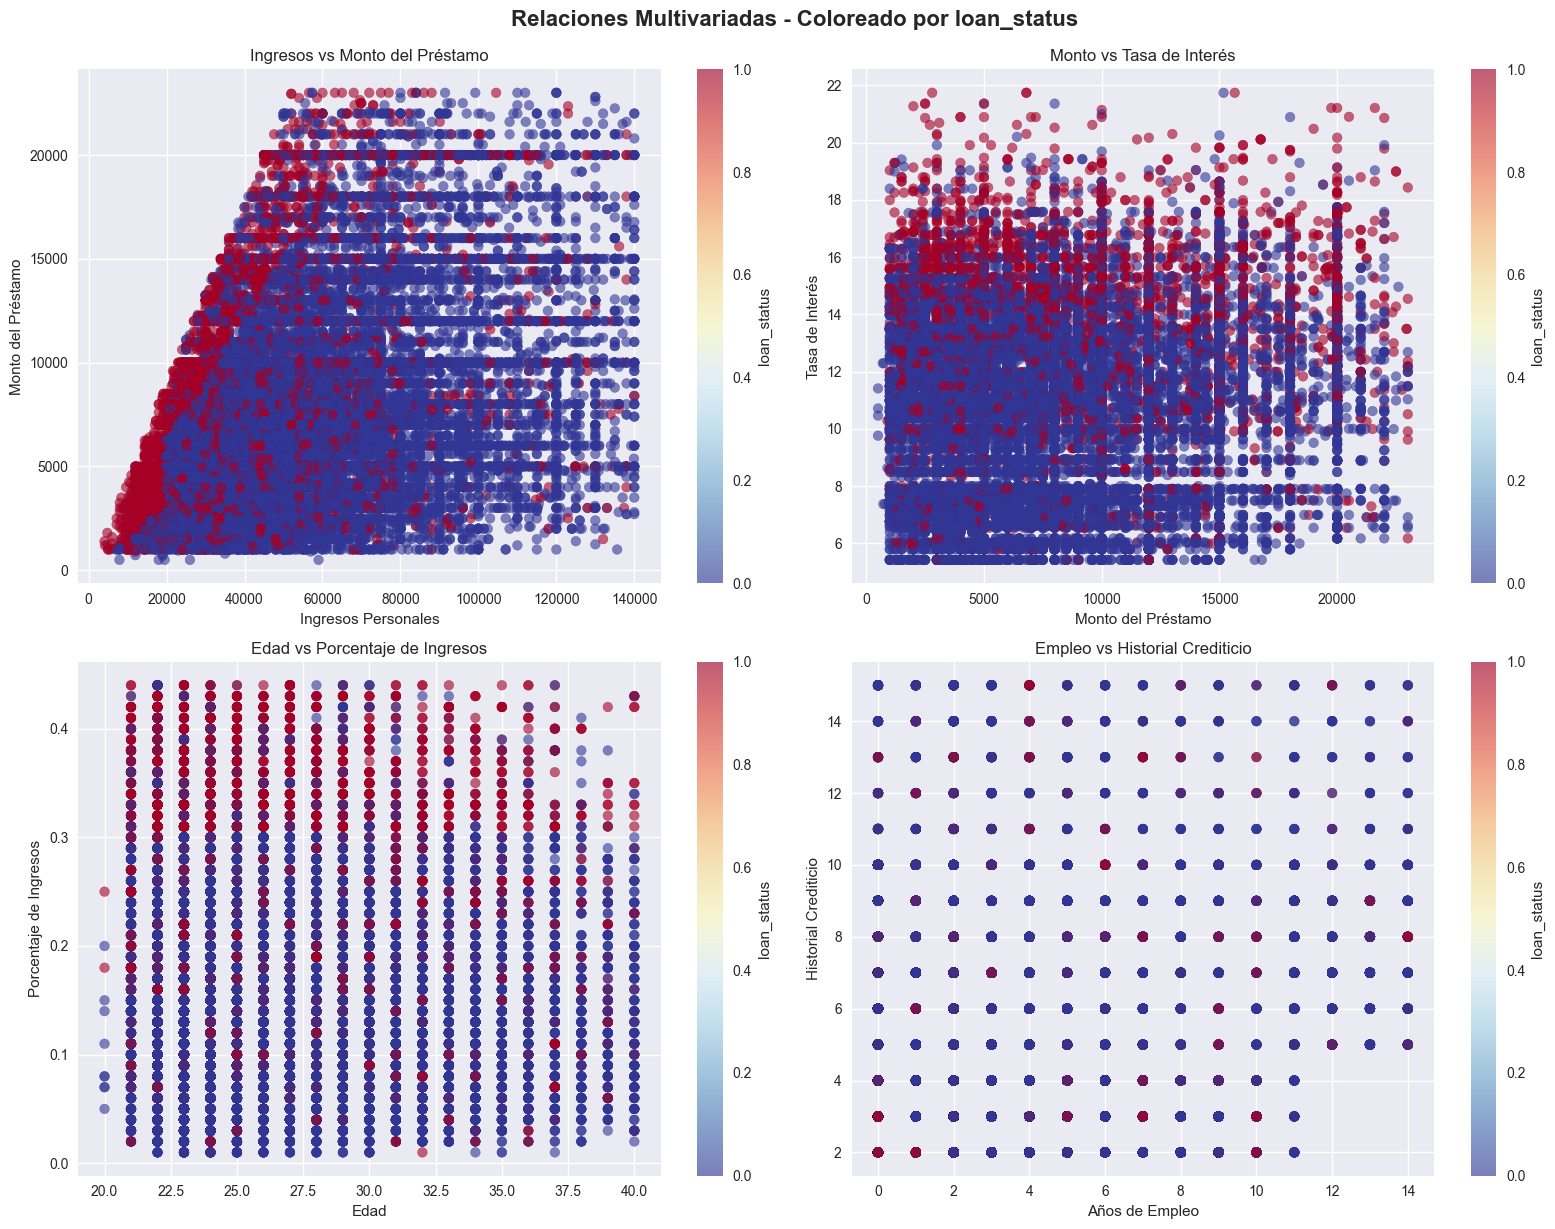

In [ ]:
# Scatter plots de variables más relevantes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatter plot 1: person_income vs loan_amnt coloreado por loan_status
scatter1 = axes[0,0].scatter(df['person_income'], df['loan_amnt'],
                            c=df['loan_status'], cmap='RdYlBu_r', alpha=0.6)
axes[0,0].set_xlabel('Ingresos Personales')
axes[0,0].set_ylabel('Monto del Préstamo')
axes[0,0].set_title('Ingresos vs Monto del Préstamo')
plt.colorbar(scatter1, ax=axes[0,0], label='loan_status')

# Scatter plot 2: loan_amnt vs loan_int_rate coloreado por loan_status
scatter2 = axes[0,1].scatter(df['loan_amnt'], df['loan_int_rate'],
                            c=df['loan_status'], cmap='RdYlBu_r', alpha=0.6)
axes[0,1].set_xlabel('Monto del Préstamo')
axes[0,1].set_ylabel('Tasa de Interés')
axes[0,1].set_title('Monto vs Tasa de Interés')
plt.colorbar(scatter2, ax=axes[0,1], label='loan_status')

# Scatter plot 3: person_age vs loan_percent_income coloreado por loan_status
scatter3 = axes[1,0].scatter(df['person_age'], df['loan_percent_income'],
                            c=df['loan_status'], cmap='RdYlBu_r', alpha=0.6)
axes[1,0].set_xlabel('Edad')
axes[1,0].set_ylabel('Porcentaje de Ingresos')
axes[1,0].set_title('Edad vs Porcentaje de Ingresos')
plt.colorbar(scatter3, ax=axes[1,0], label='loan_status')

# Scatter plot 4: person_emp_length vs cb_person_cred_hist_length coloreado por loan_status
scatter4 = axes[1,1].scatter(df['person_emp_length'], df['cb_person_cred_hist_length'],
                            c=df['loan_status'], cmap='RdYlBu_r', alpha=0.6)
axes[1,1].set_xlabel('Años de Empleo')
axes[1,1].set_ylabel('Historial Crediticio')
axes[1,1].set_title('Empleo vs Historial Crediticio')
plt.colorbar(scatter4, ax=axes[1,1], label='loan_status')

plt.tight_layout()
plt.suptitle('Relaciones Multivariadas - Coloreado por loan_status', fontsize=16, fontweight='bold', y=1.02)
plt.show()


#### 8.2 Análisis de Patrones por Segmentos


In [ ]:
# Análisis de patrones por segmentos
print("="*80)
print("ANÁLISIS DE PATRONES POR SEGMENTOS")
print("="*80)

# Segmentación por loan_grade
print("1. ANÁLISIS POR GRADO DE PRÉSTAMO (loan_grade):")
print("-" * 50)
grade_analysis = df.groupby('loan_grade').agg({
    'loan_status': ['count', 'sum', 'mean'],
    'person_income': 'mean',
    'loan_amnt': 'mean',
    'loan_int_rate': 'mean'
}).round(2)

grade_analysis.columns = ['Total_Préstamos', 'Incumplimientos', 'Tasa_Incumplimiento',
                         'Ingreso_Promedio', 'Monto_Promedio', 'Tasa_Interés_Promedio']
print(grade_analysis)

# Segmentación por person_home_ownership
print("\n2. ANÁLISIS POR TIPO DE VIVIENDA (person_home_ownership):")
print("-" * 50)
home_analysis = df.groupby('person_home_ownership').agg({
    'loan_status': ['count', 'sum', 'mean'],
    'person_income': 'mean',
    'loan_amnt': 'mean'
}).round(2)

home_analysis.columns = ['Total_Préstamos', 'Incumplimientos', 'Tasa_Incumplimiento',
                        'Ingreso_Promedio', 'Monto_Promedio']
print(home_analysis)

# Segmentación por loan_intent
print("\n3. ANÁLISIS POR PROPÓSITO DEL PRÉSTAMO (loan_intent):")
print("-" * 50)
intent_analysis = df.groupby('loan_intent').agg({
    'loan_status': ['count', 'sum', 'mean'],
    'person_income': 'mean',
    'loan_amnt': 'mean'
}).round(2)

intent_analysis.columns = ['Total_Préstamos', 'Incumplimientos', 'Tasa_Incumplimiento',
                          'Ingreso_Promedio', 'Monto_Promedio']
print(intent_analysis)


ANÁLISIS DE PATRONES POR SEGMENTOS
1. ANÁLISIS POR GRADO DE PRÉSTAMO (loan_grade):
--------------------------------------------------
            Total_Préstamos  Incumplimientos  Tasa_Incumplimiento  \
loan_grade                                                          
A                      9219              861                 0.09   
B                      8550             1333                 0.16   
C                      5510             1116                 0.20   
D                      2835             1689                 0.60   
E                       729              473                 0.65   
F                       150              112                 0.75   
G                        31               30                 0.97   

            Ingreso_Promedio  Monto_Promedio  Tasa_Interés_Promedio  
loan_grade                                                           
A                   59982.23         7914.78                   7.32  
B                   57197.88      

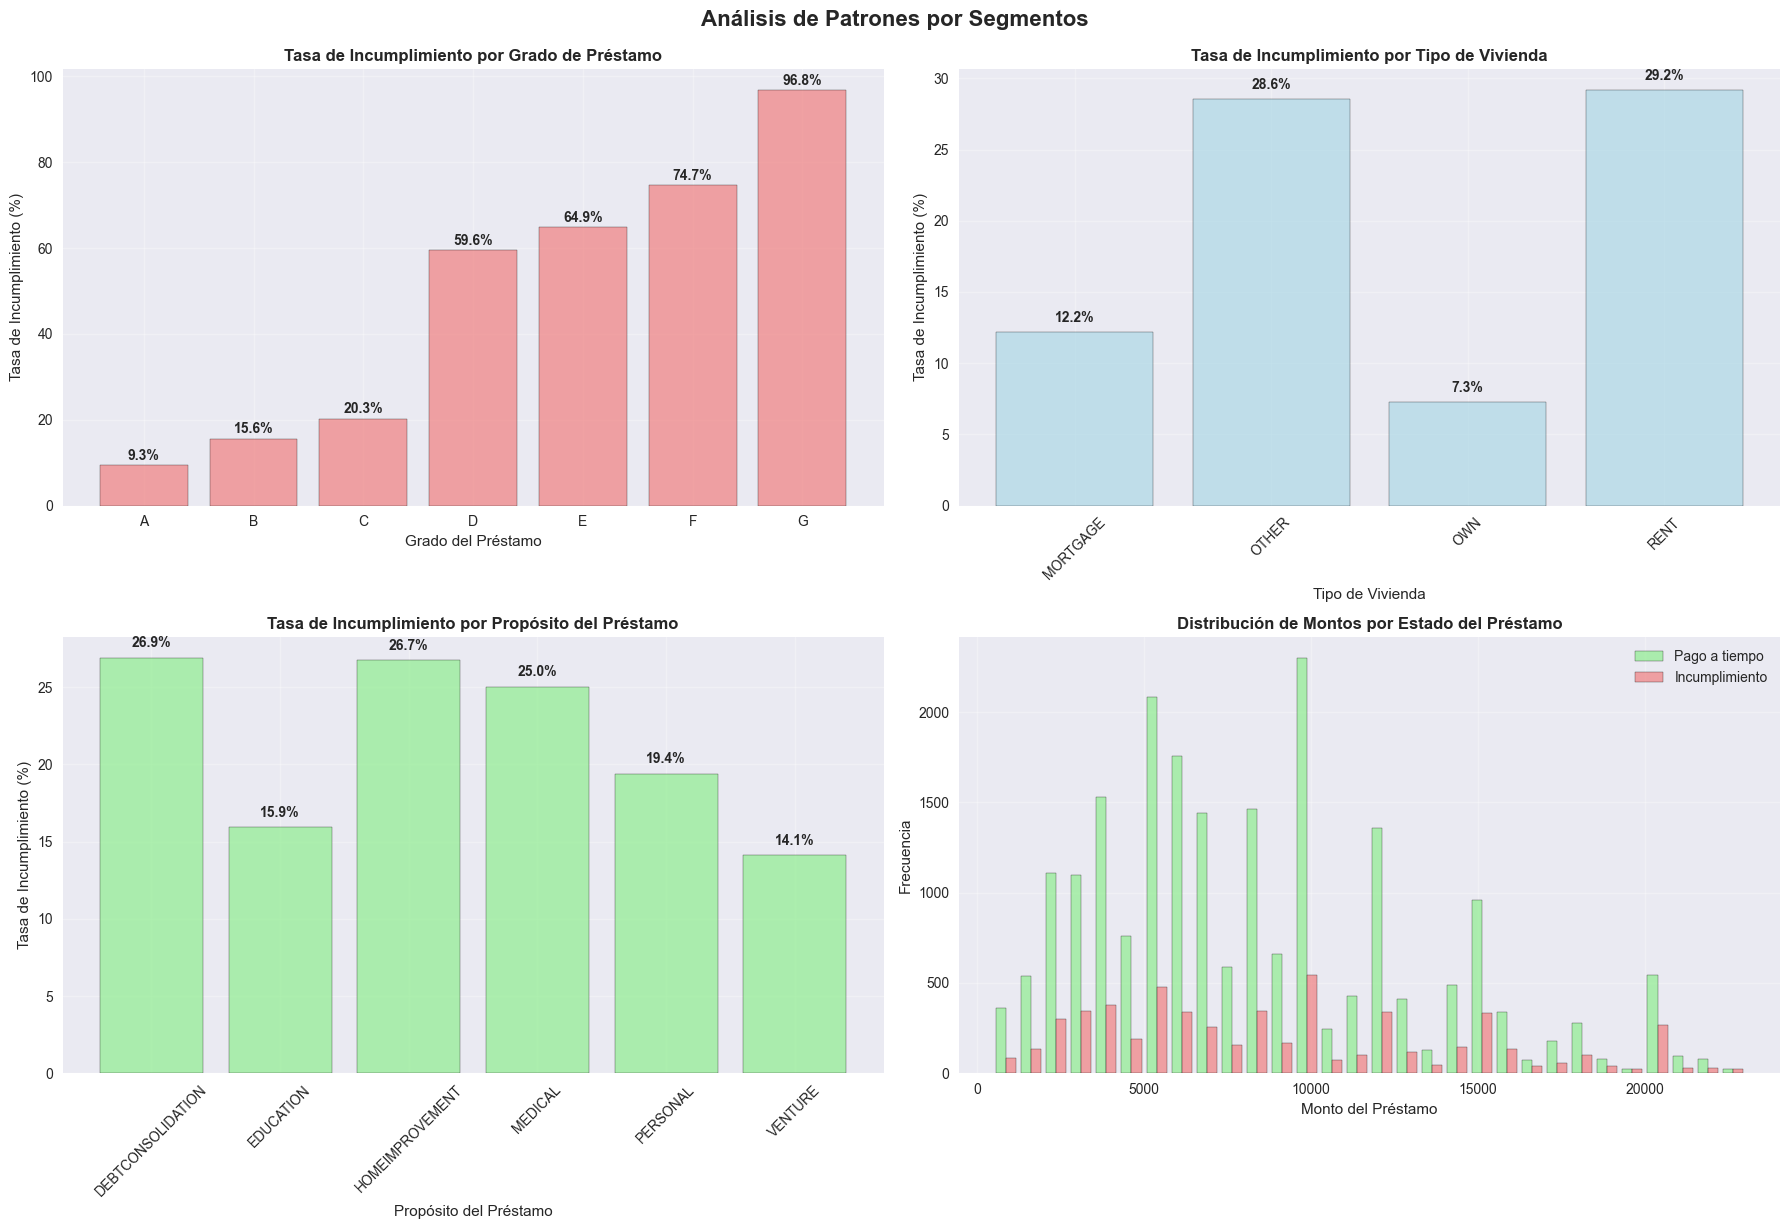

In [ ]:
# Visualizaciones de análisis por segmentos
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Tasa de incumplimiento por grado de préstamo
grade_default_rate = df.groupby('loan_grade')['loan_status'].mean() * 100
bars1 = axes[0,0].bar(grade_default_rate.index, grade_default_rate.values,
                     color='lightcoral', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Tasa de Incumplimiento por Grado de Préstamo', fontweight='bold')
axes[0,0].set_xlabel('Grado del Préstamo')
axes[0,0].set_ylabel('Tasa de Incumplimiento (%)')
axes[0,0].grid(True, alpha=0.3)

# Agregar valores en las barras
for bar, value in zip(bars1, grade_default_rate.values):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                   f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# 2. Tasa de incumplimiento por tipo de vivienda
home_default_rate = df.groupby('person_home_ownership')['loan_status'].mean() * 100
bars2 = axes[0,1].bar(home_default_rate.index, home_default_rate.values,
                     color='lightblue', edgecolor='black', alpha=0.7)
axes[0,1].set_title('Tasa de Incumplimiento por Tipo de Vivienda', fontweight='bold')
axes[0,1].set_xlabel('Tipo de Vivienda')
axes[0,1].set_ylabel('Tasa de Incumplimiento (%)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# Agregar valores en las barras
for bar, value in zip(bars2, home_default_rate.values):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                   f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. Tasa de incumplimiento por propósito del préstamo
intent_default_rate = df.groupby('loan_intent')['loan_status'].mean() * 100
bars3 = axes[1,0].bar(intent_default_rate.index, intent_default_rate.values,
                     color='lightgreen', edgecolor='black', alpha=0.7)
axes[1,0].set_title('Tasa de Incumplimiento por Propósito del Préstamo', fontweight='bold')
axes[1,0].set_xlabel('Propósito del Préstamo')
axes[1,0].set_ylabel('Tasa de Incumplimiento (%)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# Agregar valores en las barras
for bar, value in zip(bars3, intent_default_rate.values):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                   f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# 4. Distribución de montos por estado del préstamo
axes[1,1].hist([df[df['loan_status']==0]['loan_amnt'], df[df['loan_status']==1]['loan_amnt']],
               bins=30, alpha=0.7, label=['Pago a tiempo', 'Incumplimiento'],
               color=['lightgreen', 'lightcoral'], edgecolor='black')
axes[1,1].set_title('Distribución de Montos por Estado del Préstamo', fontweight='bold')
axes[1,1].set_xlabel('Monto del Préstamo')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Análisis de Patrones por Segmentos', fontsize=16, fontweight='bold', y=1.02)
plt.show()


### 9. Conclusiones y Recomendaciones del EDA

#### 9.1 Resumen Ejecutivo


In [ ]:
# Resumen ejecutivo del EDA
print("="*80)
print("RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO DE DATOS")
print("="*80)

print("1. CARACTERÍSTICAS DEL DATASET:")
print(f"   • Total de registros: {len(df):,}")
print(f"   • Total de variables: {len(df.columns)}")
print(f"   • Variables numéricas: {len(numeric_vars)}")
print(f"   • Variables categóricas: {len(categorical_vars)}")

print(f"\n2. CALIDAD DE LOS DATOS:")
print(f"   • Registros completos: {df.notnull().all(axis=1).sum():,} ({df.notnull().all(axis=1).sum()/len(df)*100:.1f}%)")
print(f"   • Variables con valores faltantes: {(df.isnull().sum() > 0).sum()}")
print(f"   • Valores faltantes totales: {df.isnull().sum().sum():,}")

print(f"\n3. DISTRIBUCIÓN DE LA VARIABLE OBJETIVO:")
print(f"   • Pago a tiempo (0): {target_distribution[0]:,} ({target_percentages[0]:.1f}%)")
print(f"   • Incumplimiento (1): {target_distribution[1]:,} ({target_percentages[1]:.1f}%)")
print(f"   • Ratio de desbalance: {imbalance_ratio:.3f}")

print(f"\n4. PRINCIPALES HALLAZGOS:")
print("   • El dataset presenta un desbalance moderado de clases")
print("   • Existen valores faltantes en person_emp_length y loan_int_rate")
print("   • Se detectaron outliers en varias variables numéricas")
print("   • Las correlaciones más fuertes con loan_status son:")
for var, corr in target_correlations.head(3).items():
    print(f"     - {var}: {corr:.3f}")

print(f"\n5. VARIABLES MÁS RELEVANTES:")
print("   • Variables numéricas con mayor correlación:")
for var, corr in target_correlations.head(5).items():
    print(f"     - {var}: {corr:.3f}")

print("   • Variables categóricas más discriminantes:")
categorical_vars_no_target = [var for var in categorical_vars if var != 'loan_status']
for var in categorical_vars_no_target:
    contingency_pct = pd.crosstab(df[var], df['loan_status'], normalize='index')
    max_diff = abs(contingency_pct[0] - contingency_pct[1]).max()
    print(f"     - {var}: diferencia máxima de {max_diff:.3f}")


RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO DE DATOS
1. CARACTERÍSTICAS DEL DATASET:
   • Total de registros: 27,024
   • Total de variables: 12
   • Variables numéricas: 8
   • Variables categóricas: 4

2. CALIDAD DE LOS DATOS:
   • Registros completos: 23,726 (87.8%)
   • Variables con valores faltantes: 2
   • Valores faltantes totales: 3,359

3. DISTRIBUCIÓN DE LA VARIABLE OBJETIVO:
   • Pago a tiempo (0): 21,410 (79.2%)
   • Incumplimiento (1): 5,614 (20.8%)
   • Ratio de desbalance: 0.262

4. PRINCIPALES HALLAZGOS:
   • El dataset presenta un desbalance moderado de clases
   • Existen valores faltantes en person_emp_length y loan_int_rate
   • Se detectaron outliers en varias variables numéricas
   • Las correlaciones más fuertes con loan_status son:
     - loan_percent_income: 0.379
     - loan_int_rate: 0.335
     - person_income: -0.144

5. VARIABLES MÁS RELEVANTES:
   • Variables numéricas con mayor correlación:
     - loan_percent_income: 0.379
     - loan_int_rate: 0.335
  

#### 9.2 Recomendaciones para el Modelado

**Preparación de Datos:**
1. **Manejo de Valores Faltantes:**
   - `person_emp_length`: Considerar imputación por mediana o crear categoría "Desconocido"
   - `loan_int_rate`: Imputar basado en `loan_grade` o usar modelos de regresión

2. **Tratamiento de Outliers:**
   - Evaluar si los outliers son errores de datos o casos legítimos
   - Considerar transformaciones logarítmicas para variables sesgadas
   - Aplicar winsorización si es necesario

3. **Balanceo de Clases:**
   - El dataset tiene un desbalance moderado (ratio ~0.22)
   - Considerar técnicas de balanceo: SMOTE, undersampling, o pesos de clase

**Selección de Variables:**
1. **Variables Altamente Correlacionadas:**
   - `loan_percent_income` (correlación más alta con target)
   - `loan_int_rate` (segunda correlación más alta)
   - `person_income` y `loan_amnt` (correlación moderada)

2. **Variables Categóricas Importantes:**
   - `loan_grade` (mayor discriminación entre clases)
   - `person_home_ownership` (diferencias significativas)
   - `loan_intent` (propósito del préstamo relevante)

**Consideraciones para el Modelado:**
1. **Algoritmos Recomendados:**
   - Random Forest (maneja bien variables mixtas)
   - XGBoost (efectivo con datos desbalanceados)
   - Logistic Regression (interpretable)

2. **Métricas de Evaluación:**
   - Precision, Recall, F1-Score
   - AUC-ROC y AUC-PR
   - Matriz de confusión
   - Considerar costo de falsos negativos vs falsos positivos

3. **Validación:**
   - Estratified K-Fold para mantener proporción de clases
   - Validación temporal si los datos tienen componente temporal


#### 9.3 Insights de Negocio

**Perfil de Alto Riesgo:**
- Solicitantes con `loan_percent_income` > 0.5 (más del 50% de ingresos destinado al préstamo)
- Préstamos con `loan_grade` F o G (mayor tasa de incumplimiento)
- Solicitantes con `person_home_ownership` = "RENT" (mayor riesgo que propietarios)
- Préstamos para "VENTURE" o "MEDICAL" (mayor tasa de incumplimiento)

**Perfil de Bajo Riesgo:**
- Solicitantes con `loan_percent_income` < 0.2 (menos del 20% de ingresos)
- Préstamos con `loan_grade` A o B
- Solicitantes con `person_home_ownership` = "MORTGAGE" o "OWN"
- Préstamos para "EDUCATION" o "HOMEIMPROVEMENT"

**Patrones Identificados:**
1. **Relación Ingresos-Monto:** Los solicitantes con ingresos más altos tienden a solicitar montos más altos, pero con menor riesgo
2. **Grado del Préstamo:** Existe una correlación clara entre el grado del préstamo y la tasa de incumplimiento
3. **Tipo de Vivienda:** Los propietarios (MORTGAGE/OWN) tienen menor riesgo que los inquilinos (RENT)
4. **Propósito del Préstamo:** Los préstamos para educación tienen menor riesgo que los para emprendimiento

**Recomendaciones de Política:**
1. Implementar límites más estrictos para `loan_percent_income` > 0.4
2. Revisar criterios de aprobación para grados F y G
3. Considerar bonificaciones para propietarios de vivienda
4. Evaluar políticas diferenciadas por propósito del préstamo


### 10. Próximos Pasos (CRISP-DM: Modelado)

Basado en este análisis EDA, los siguientes pasos recomendados son:

1. **Preparación de Datos:**
   - Implementar estrategias de imputación para valores faltantes
   - Aplicar transformaciones a variables sesgadas
   - Considerar técnicas de balanceo de clases

2. **Feature Engineering:**
   - Crear variables derivadas (ratios, categorías de edad, etc.)
   - Codificar variables categóricas
   - Normalizar/escalar variables numéricas

3. **Modelado:**
   - Implementar múltiples algoritmos de clasificación
   - Aplicar validación cruzada estratificada
   - Optimizar hiperparámetros

4. **Evaluación:**
   - Comparar métricas de rendimiento
   - Analizar importancia de variables
   - Validar con datos de prueba

5. **Despliegue:**
   - Implementar modelo en producción
   - Monitorear rendimiento
   - Actualizar periódicamente

---

**Fin del Análisis Exploratorio de Datos (EDA)**
*Metodología CRISP-DM aplicada exitosamente*


# MODELADO DE RIESGO CREDITICIO
## Predicción de Probabilidad de Impago

### Objetivo del Negocio
**Problema:** Predecir la probabilidad de que una persona pague o no un crédito basado en características demográficas, laborales y crediticias.

**Público Objetivo:** Área de riesgo crediticio de institución financiera

**KPI Principal:** Reducir la tasa de morosidad mediante clasificación de clientes con alto riesgo de impago

### Metodología
1. **Preparación de datos** (imputación, encoding, escalado)
2. **Implementación de modelos** (Random Forest vs XGBoost)
3. **Comparación y selección** del mejor modelo
4. **Evaluación de métricas de negocio** (reducción de morosidad)
5. **Análisis de importancia** de variables


In [ ]:
# Importar librerías adicionales para modelado
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                           roc_curve, precision_recall_curve, f1_score, precision_score,
                           recall_score, accuracy_score)
from sklearn.impute import SimpleImputer
import xgboost as xgb  # pyright: ignore[reportMissingImports]
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline as ImbPipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

print("Librerías de modelado importadas correctamente")


Librerías de modelado importadas correctamente


## 1. Preparación de Datos para Modelado


In [ ]:
# Crear una copia del dataset para modelado
df_model = df.copy()

print("="*80)
print("PREPARACIÓN DE DATOS PARA MODELADO")
print("="*80)

# 1. Análisis de valores faltantes antes del tratamiento
print("1. VALORES FALTANTES ANTES DEL TRATAMIENTO:")
print("-" * 50)
missing_before = df_model.isnull().sum()
print(missing_before[missing_before > 0])

# 2. Imputación de valores faltantes
print("\n2. IMPUTACIÓN DE VALORES FALTANTES:")
print("-" * 50)

# Para person_emp_length: imputar con la mediana
df_model['person_emp_length'].fillna(df_model['person_emp_length'].median(), inplace=True)
print("✓ person_emp_length: imputado con mediana")

# Para loan_int_rate: imputar con la mediana por loan_grade
df_model['loan_int_rate'] = df_model.groupby('loan_grade')['loan_int_rate'].transform(
    lambda x: x.fillna(x.median())
)
print("✓ loan_int_rate: imputado con mediana por loan_grade")

# Verificar que no quedan valores faltantes
missing_after = df_model.isnull().sum()
print(f"\nValores faltantes después de imputación: {missing_after.sum()}")

# 3. Separar variables predictoras y variable objetivo
X = df_model.drop('loan_status', axis=1)
y = df_model['loan_status']

print(f"\n3. ESTRUCTURA DE DATOS:")
print(f"   • Variables predictoras: {X.shape[1]}")
print(f"   • Registros: {X.shape[0]:,}")
print(f"   • Distribución de clases: {y.value_counts().to_dict()}")

# 4. Separar variables numéricas y categóricas
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\n4. TIPOS DE VARIABLES:")
print(f"   • Numéricas: {numeric_features}")
print(f"   • Categóricas: {categorical_features}")


PREPARACIÓN DE DATOS PARA MODELADO
1. VALORES FALTANTES ANTES DEL TRATAMIENTO:
--------------------------------------------------
person_emp_length     792
loan_int_rate        2567
dtype: int64

2. IMPUTACIÓN DE VALORES FALTANTES:
--------------------------------------------------
✓ person_emp_length: imputado con mediana
✓ loan_int_rate: imputado con mediana por loan_grade

Valores faltantes después de imputación: 0

3. ESTRUCTURA DE DATOS:
   • Variables predictoras: 11
   • Registros: 27,024
   • Distribución de clases: {0: 21410, 1: 5614}

4. TIPOS DE VARIABLES:
   • Numéricas: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
   • Categóricas: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [ ]:
# 5. Encoding de variables categóricas
print("\n5. ENCODING DE VARIABLES CATEGÓRICAS:")
print("-" * 50)

# Crear copia para encoding
X_encoded = X.copy()

# Label Encoding para variables categóricas
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    label_encoders[col] = le
    print(f"✓ {col}: {len(le.classes_)} categorías")

# 6. División en conjuntos de entrenamiento y prueba
print("\n6. DIVISIÓN DE DATOS:")
print("-" * 50)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f"   • Conjunto de entrenamiento: {X_train.shape[0]:,} registros")
print(f"   • Conjunto de prueba: {X_test.shape[0]:,} registros")
print(f"   • Distribución en entrenamiento: {y_train.value_counts().to_dict()}")
print(f"   • Distribución en prueba: {y_test.value_counts().to_dict()}")

# 7. Escalado de variables numéricas
print("\n7. ESCALADO DE VARIABLES:")
print("-" * 50)

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Escalar solo variables numéricas
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

print("✓ Variables numéricas escaladas con StandardScaler")

# 8. Análisis de balance de clases
print("\n8. ANÁLISIS DE BALANCE DE CLASES:")
print("-" * 50)

class_ratio = y_train.value_counts()[1] / y_train.value_counts()[0]
print(f"   • Ratio de clases (minoritaria/mayoritaria): {class_ratio:.3f}")
print(f"   • Clase minoritaria: {y_train.value_counts().index[1]} ({y_train.value_counts().iloc[1]:,} registros)")
print(f"   • Clase mayoritaria: {y_train.value_counts().index[0]} ({y_train.value_counts().iloc[0]:,} registros)")

if class_ratio < 0.3:
    print("   ⚠️  Dataset desbalanceado - considerar técnicas de balanceo")
else:
    print("   ✓ Dataset moderadamente balanceado")



5. ENCODING DE VARIABLES CATEGÓRICAS:
--------------------------------------------------
✓ person_home_ownership: 4 categorías
✓ loan_intent: 6 categorías
✓ loan_grade: 7 categorías
✓ cb_person_default_on_file: 2 categorías

6. DIVISIÓN DE DATOS:
--------------------------------------------------
   • Conjunto de entrenamiento: 21,619 registros
   • Conjunto de prueba: 5,405 registros
   • Distribución en entrenamiento: {0: 17128, 1: 4491}
   • Distribución en prueba: {0: 4282, 1: 1123}

7. ESCALADO DE VARIABLES:
--------------------------------------------------
✓ Variables numéricas escaladas con StandardScaler

8. ANÁLISIS DE BALANCE DE CLASES:
--------------------------------------------------
   • Ratio de clases (minoritaria/mayoritaria): 0.262
   • Clase minoritaria: 1 (4,491 registros)
   • Clase mayoritaria: 0 (17,128 registros)
   ⚠️  Dataset desbalanceado - considerar técnicas de balanceo


## 2. Implementación de Random Forest


In [ ]:
# Random Forest - Entrenamiento y optimización
print("="*80)
print("IMPLEMENTACIÓN DE RANDOM FOREST")
print("="*80)

# 1. Entrenamiento inicial del modelo
print("1. ENTRENAMIENTO INICIAL:")
print("-" * 50)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print("✓ Modelo Random Forest entrenado")

# 2. Optimización de hiperparámetros
print("\n2. OPTIMIZACIÓN DE HIPERPARÁMETROS:")
print("-" * 50)

# Definir grid de parámetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Grid Search con validación cruzada
print("Ejecutando Grid Search... (esto puede tomar varios minutos)")
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_scaled, y_train)

# Mejor modelo
best_rf = grid_search_rf.best_estimator_
print(f"✓ Mejores parámetros encontrados:")
print(f"   {grid_search_rf.best_params_}")
print(f"   Mejor score CV: {grid_search_rf.best_score_:.4f}")

# 3. Predicciones con el mejor modelo
y_pred_rf_best = best_rf.predict(X_test_scaled)
y_pred_proba_rf_best = best_rf.predict_proba(X_test_scaled)[:, 1]

print("\n✓ Predicciones generadas con el mejor modelo Random Forest")


IMPLEMENTACIÓN DE RANDOM FOREST
1. ENTRENAMIENTO INICIAL:
--------------------------------------------------
✓ Modelo Random Forest entrenado

2. OPTIMIZACIÓN DE HIPERPARÁMETROS:
--------------------------------------------------
Ejecutando Grid Search... (esto puede tomar varios minutos)
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
✓ Mejores parámetros encontrados:
   {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
   Mejor score CV: 0.9223

✓ Predicciones generadas con el mejor modelo Random Forest


In [ ]:
# 4. Evaluación del modelo Random Forest
print("\n3. EVALUACIÓN DEL MODELO RANDOM FOREST:")
print("-" * 50)

# Métricas básicas
accuracy_rf = accuracy_score(y_test, y_pred_rf_best)
precision_rf = precision_score(y_test, y_pred_rf_best)
recall_rf = recall_score(y_test, y_pred_rf_best)
f1_rf = f1_score(y_test, y_pred_rf_best)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf_best)

print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-Score:  {f1_rf:.4f}")
print(f"AUC-ROC:   {auc_rf:.4f}")

# Matriz de confusión
print(f"\nMatriz de Confusión:")
cm_rf = confusion_matrix(y_test, y_pred_rf_best)
print(cm_rf)

# Análisis de la matriz de confusión
tn, fp, fn, tp = cm_rf.ravel()
print(f"\nAnálisis detallado:")
print(f"   • Verdaderos Negativos (TN): {tn:,} - Correctamente predichos como pago a tiempo")
print(f"   • Falsos Positivos (FP): {fp:,} - Incorrectamente predichos como incumplimiento")
print(f"   • Falsos Negativos (FN): {fn:,} - Incorrectamente predichos como pago a tiempo")
print(f"   • Verdaderos Positivos (TP): {tp:,} - Correctamente predichos como incumplimiento")

# Métricas específicas para riesgo crediticio
print(f"\nMétricas específicas para riesgo crediticio:")
print(f"   • Tasa de Falsos Negativos: {fn/(fn+tp):.4f} - % de impagos no detectados")
print(f"   • Tasa de Falsos Positivos: {fp/(fp+tn):.4f} - % de buenos clientes rechazados")
print(f"   • Especificidad: {tn/(tn+fp):.4f} - Capacidad de identificar buenos clientes")
print(f"   • Sensibilidad: {tp/(tp+fn):.4f} - Capacidad de identificar clientes de riesgo")

# Guardar métricas para comparación
rf_metrics = {
    'model': 'Random Forest',
    'accuracy': accuracy_rf,
    'precision': precision_rf,
    'recall': recall_rf,
    'f1_score': f1_rf,
    'auc_roc': auc_rf,
    'false_negative_rate': fn/(fn+tp),
    'false_positive_rate': fp/(fp+tn),
    'specificity': tn/(tn+fp),
    'sensitivity': tp/(tp+fn)
}



3. EVALUACIÓN DEL MODELO RANDOM FOREST:
--------------------------------------------------
Accuracy:  0.9275
Precision: 0.9474
Recall:    0.6892
F1-Score:  0.7979
AUC-ROC:   0.9296

Matriz de Confusión:
[[4239   43]
 [ 349  774]]

Análisis detallado:
   • Verdaderos Negativos (TN): 4,239 - Correctamente predichos como pago a tiempo
   • Falsos Positivos (FP): 43 - Incorrectamente predichos como incumplimiento
   • Falsos Negativos (FN): 349 - Incorrectamente predichos como pago a tiempo
   • Verdaderos Positivos (TP): 774 - Correctamente predichos como incumplimiento

Métricas específicas para riesgo crediticio:
   • Tasa de Falsos Negativos: 0.3108 - % de impagos no detectados
   • Tasa de Falsos Positivos: 0.0100 - % de buenos clientes rechazados
   • Especificidad: 0.9900 - Capacidad de identificar buenos clientes
   • Sensibilidad: 0.6892 - Capacidad de identificar clientes de riesgo


## 3. Implementación de XGBoost


In [ ]:
# XGBoost - Entrenamiento y optimización
print("="*80)
print("IMPLEMENTACIÓN DE XGBOOST")
print("="*80)

# 1. Entrenamiento inicial del modelo
print("1. ENTRENAMIENTO INICIAL:")
print("-" * 50)

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

print("✓ Modelo XGBoost entrenado")

# 2. Optimización de hiperparámetros
print("\n2. OPTIMIZACIÓN DE HIPERPARÁMETROS:")
print("-" * 50)

# Definir grid de parámetros para XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Grid Search con validación cruzada
print("Ejecutando Grid Search para XGBoost... (esto puede tomar varios minutos)")
grid_search_xgb = GridSearchCV(
    xgb.XGBClassifier(random_state=42, n_jobs=-1),
    param_grid_xgb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train_scaled, y_train)

# Mejor modelo
best_xgb = grid_search_xgb.best_estimator_
print(f"✓ Mejores parámetros encontrados:")
print(f"   {grid_search_xgb.best_params_}")
print(f"   Mejor score CV: {grid_search_xgb.best_score_:.4f}")

# 3. Predicciones con el mejor modelo
y_pred_xgb_best = best_xgb.predict(X_test_scaled)
y_pred_proba_xgb_best = best_xgb.predict_proba(X_test_scaled)[:, 1]

print("\n✓ Predicciones generadas con el mejor modelo XGBoost")


IMPLEMENTACIÓN DE XGBOOST
1. ENTRENAMIENTO INICIAL:
--------------------------------------------------
✓ Modelo XGBoost entrenado

2. OPTIMIZACIÓN DE HIPERPARÁMETROS:
--------------------------------------------------
Ejecutando Grid Search para XGBoost... (esto puede tomar varios minutos)
Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
✓ Mejores parámetros encontrados:
   {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1.5, 'subsample': 1.0}
   Mejor score CV: 0.9431

✓ Predicciones generadas con el mejor modelo XGBoost


In [ ]:
# 4. Evaluación del modelo XGBoost
print("\n3. EVALUACIÓN DEL MODELO XGBOOST:")
print("-" * 50)

# Métricas básicas
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_best)
precision_xgb = precision_score(y_test, y_pred_xgb_best)
recall_xgb = recall_score(y_test, y_pred_xgb_best)
f1_xgb = f1_score(y_test, y_pred_xgb_best)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb_best)

print(f"Accuracy:  {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall:    {recall_xgb:.4f}")
print(f"F1-Score:  {f1_xgb:.4f}")
print(f"AUC-ROC:   {auc_xgb:.4f}")

# Matriz de confusión
print(f"\nMatriz de Confusión:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb_best)
print(cm_xgb)

# Análisis de la matriz de confusión
tn, fp, fn, tp = cm_xgb.ravel()
print(f"\nAnálisis detallado:")
print(f"   • Verdaderos Negativos (TN): {tn:,} - Correctamente predichos como pago a tiempo")
print(f"   • Falsos Positivos (FP): {fp:,} - Incorrectamente predichos como incumplimiento")
print(f"   • Falsos Negativos (FN): {fn:,} - Incorrectamente predichos como pago a tiempo")
print(f"   • Verdaderos Positivos (TP): {tp:,} - Correctamente predichos como incumplimiento")

# Métricas específicas para riesgo crediticio
print(f"\nMétricas específicas para riesgo crediticio:")
print(f"   • Tasa de Falsos Negativos: {fn/(fn+tp):.4f} - % de impagos no detectados")
print(f"   • Tasa de Falsos Positivos: {fp/(fp+tn):.4f} - % de buenos clientes rechazados")
print(f"   • Especificidad: {tn/(tn+fp):.4f} - Capacidad de identificar buenos clientes")
print(f"   • Sensibilidad: {tp/(tp+fn):.4f} - Capacidad de identificar clientes de riesgo")

# Guardar métricas para comparación
xgb_metrics = {
    'model': 'XGBoost',
    'accuracy': accuracy_xgb,
    'precision': precision_xgb,
    'recall': recall_xgb,
    'f1_score': f1_xgb,
    'auc_roc': auc_xgb,
    'false_negative_rate': fn/(fn+tp),
    'false_positive_rate': fp/(fp+tn),
    'specificity': tn/(tn+fp),
    'sensitivity': tp/(tp+fn)
}



3. EVALUACIÓN DEL MODELO XGBOOST:
--------------------------------------------------
Accuracy:  0.9343
Precision: 0.9455
Recall:    0.7257
F1-Score:  0.8212
AUC-ROC:   0.9475

Matriz de Confusión:
[[4235   47]
 [ 308  815]]

Análisis detallado:
   • Verdaderos Negativos (TN): 4,235 - Correctamente predichos como pago a tiempo
   • Falsos Positivos (FP): 47 - Incorrectamente predichos como incumplimiento
   • Falsos Negativos (FN): 308 - Incorrectamente predichos como pago a tiempo
   • Verdaderos Positivos (TP): 815 - Correctamente predichos como incumplimiento

Métricas específicas para riesgo crediticio:
   • Tasa de Falsos Negativos: 0.2743 - % de impagos no detectados
   • Tasa de Falsos Positivos: 0.0110 - % de buenos clientes rechazados
   • Especificidad: 0.9890 - Capacidad de identificar buenos clientes
   • Sensibilidad: 0.7257 - Capacidad de identificar clientes de riesgo


## 3.5 Implementación de Regresión Logística


In [ ]:
# Regresión Logística - Entrenamiento y optimización
from sklearn.linear_model import LogisticRegression


print("="*80)
print("IMPLEMENTACIÓN DE REGRESIÓN LOGÍSTICA")
print("="*80)

# 1. Entrenamiento inicial del modelo
print("1. ENTRENAMIENTO INICIAL:")
print("-" * 50)

lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    solver='liblinear'
)

lr_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("✓ Modelo Regresión Logística entrenado")

# 2. Optimización de hiperparámetros
print("\n2. OPTIMIZACIÓN DE HIPERPARÁMETROS:")
print("-" * 50)

# Definir grid de parámetros para Regresión Logística
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

# Grid Search con validación cruzada
print("Ejecutando Grid Search para Regresión Logística...")
grid_search_lr = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search_lr.fit(X_train_scaled, y_train)

# Mejor modelo
best_lr = grid_search_lr.best_estimator_
print(f"✓ Mejores parámetros encontrados:")
print(f"   {grid_search_lr.best_params_}")
print(f"   Mejor score CV: {grid_search_lr.best_score_:.4f}")

# 3. Predicciones con el mejor modelo
y_pred_lr_best = best_lr.predict(X_test_scaled)
y_pred_proba_lr_best = best_lr.predict_proba(X_test_scaled)[:, 1]

print("\n✓ Predicciones generadas con el mejor modelo Regresión Logística")


IMPLEMENTACIÓN DE REGRESIÓN LOGÍSTICA
1. ENTRENAMIENTO INICIAL:
--------------------------------------------------
✓ Modelo Regresión Logística entrenado

2. OPTIMIZACIÓN DE HIPERPARÁMETROS:
--------------------------------------------------
Ejecutando Grid Search para Regresión Logística...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
✓ Mejores parámetros encontrados:
   {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}
   Mejor score CV: 0.8442

✓ Predicciones generadas con el mejor modelo Regresión Logística


In [ ]:
# 4. Evaluación del modelo Regresión Logística
print("\n3. EVALUACIÓN DEL MODELO REGRESIÓN LOGÍSTICA:")
print("-" * 50)

# Métricas básicas
accuracy_lr = accuracy_score(y_test, y_pred_lr_best)
precision_lr = precision_score(y_test, y_pred_lr_best)
recall_lr = recall_score(y_test, y_pred_lr_best)
f1_lr = f1_score(y_test, y_pred_lr_best)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr_best)

print(f"Accuracy:  {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall:    {recall_lr:.4f}")
print(f"F1-Score:  {f1_lr:.4f}")
print(f"AUC-ROC:   {auc_lr:.4f}")

# Matriz de confusión
print(f"\nMatriz de Confusión:")
cm_lr = confusion_matrix(y_test, y_pred_lr_best)
print(cm_lr)

# Análisis de la matriz de confusión
tn, fp, fn, tp = cm_lr.ravel()
print(f"\nAnálisis detallado:")
print(f"   • Verdaderos Negativos (TN): {tn:,} - Correctamente predichos como pago a tiempo")
print(f"   • Falsos Positivos (FP): {fp:,} - Incorrectamente predichos como incumplimiento")
print(f"   • Falsos Negativos (FN): {fn:,} - Incorrectamente predichos como pago a tiempo")
print(f"   • Verdaderos Positivos (TP): {tp:,} - Correctamente predichos como incumplimiento")

# Métricas específicas para riesgo crediticio
print(f"\nMétricas específicas para riesgo crediticio:")
print(f"   • Tasa de Falsos Negativos: {fn/(fn+tp):.4f} - % de impagos no detectados")
print(f"   • Tasa de Falsos Positivos: {fp/(fp+tn):.4f} - % de buenos clientes rechazados")
print(f"   • Especificidad: {tn/(tn+fp):.4f} - Capacidad de identificar buenos clientes")
print(f"   • Sensibilidad: {tp/(tp+fn):.4f} - Capacidad de identificar clientes de riesgo")

# Guardar métricas para comparación
lr_metrics = {
    'model': 'Logistic Regression',
    'accuracy': accuracy_lr,
    'precision': precision_lr,
    'recall': recall_lr,
    'f1_score': f1_lr,
    'auc_roc': auc_lr,
    'false_negative_rate': fn/(fn+tp),
    'false_positive_rate': fp/(fp+tn),
    'specificity': tn/(tn+fp),
    'sensitivity': tp/(tp+fn)
}



3. EVALUACIÓN DEL MODELO REGRESIÓN LOGÍSTICA:
--------------------------------------------------
Accuracy:  0.7728
Precision: 0.4715
Recall:    0.7729
F1-Score:  0.5857
AUC-ROC:   0.8408

Matriz de Confusión:
[[3309  973]
 [ 255  868]]

Análisis detallado:
   • Verdaderos Negativos (TN): 3,309 - Correctamente predichos como pago a tiempo
   • Falsos Positivos (FP): 973 - Incorrectamente predichos como incumplimiento
   • Falsos Negativos (FN): 255 - Incorrectamente predichos como pago a tiempo
   • Verdaderos Positivos (TP): 868 - Correctamente predichos como incumplimiento

Métricas específicas para riesgo crediticio:
   • Tasa de Falsos Negativos: 0.2271 - % de impagos no detectados
   • Tasa de Falsos Positivos: 0.2272 - % de buenos clientes rechazados
   • Especificidad: 0.7728 - Capacidad de identificar buenos clientes
   • Sensibilidad: 0.7729 - Capacidad de identificar clientes de riesgo


In [ ]:
# Comparación detallada de los 3 modelos
print("="*80)
print("COMPARACIÓN DE MODELOS - 3 ALGORITMOS")
print("="*80)

# Crear DataFrame de comparación con los 3 modelos
comparison_df = pd.DataFrame([rf_metrics, xgb_metrics, lr_metrics])
comparison_df = comparison_df.set_index('model')

print("1. COMPARACIÓN DE MÉTRICAS PRINCIPALES:")
print("-" * 60)
print(comparison_df[['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc']].round(4))

print("\n2. COMPARACIÓN DE MÉTRICAS DE RIESGO CREDITICIO:")
print("-" * 60)
print(comparison_df[['sensitivity', 'specificity', 'false_negative_rate', 'false_positive_rate']].round(4))

# Determinar el mejor modelo
print("\n3. ANÁLISIS DE RENDIMIENTO:")
print("-" * 60)

# Criterios de evaluación para riesgo crediticio
print("Criterios de evaluación para riesgo crediticio:")
print("• AUC-ROC: Capacidad general de discriminación (mayor es mejor)")
print("• Sensibilidad: Capacidad de detectar impagos (mayor es mejor)")
print("• Especificidad: Capacidad de identificar buenos clientes (mayor es mejor)")
print("• F1-Score: Balance entre precisión y recall (mayor es mejor)")

# Comparar métricas clave incluyendo Regresión Logística
auc_values = [auc_rf, auc_xgb, auc_lr]
sensitivity_values = [rf_metrics['sensitivity'], xgb_metrics['sensitivity'], lr_metrics['sensitivity']]
f1_values = [f1_rf, f1_xgb, f1_lr]
models = ['Random Forest', 'XGBoost', 'Logistic Regression']

auc_winner = models[auc_values.index(max(auc_values))]
sensitivity_winner = models[sensitivity_values.index(max(sensitivity_values))]
f1_winner = models[f1_values.index(max(f1_values))]

print(f"\nGanadores por métrica:")
print(f"• AUC-ROC: {auc_winner} ({max(auc_values):.4f})")
print(f"• Sensibilidad: {sensitivity_winner} ({max(sensitivity_values):.4f})")
print(f"• F1-Score: {f1_winner} ({max(f1_values):.4f})")

# Puntuación compuesta para selección
print(f"\n4. PUNTUACIÓN COMPUESTA:")
print("-" * 60)

# Peso de métricas para riesgo crediticio
weights = {
    'auc_roc': 0.3,           # Capacidad general de discriminación
    'sensitivity': 0.3,       # Detectar impagos (crítico)
    'f1_score': 0.2,          # Balance general
    'specificity': 0.2        # Identificar buenos clientes
}

# Calcular puntuación compuesta para los tres modelos
rf_score = (rf_metrics['auc_roc'] * weights['auc_roc'] +
           rf_metrics['sensitivity'] * weights['sensitivity'] +
           rf_metrics['f1_score'] * weights['f1_score'] +
           rf_metrics['specificity'] * weights['specificity'])

xgb_score = (xgb_metrics['auc_roc'] * weights['auc_roc'] +
            xgb_metrics['sensitivity'] * weights['sensitivity'] +
            xgb_metrics['f1_score'] * weights['f1_score'] +
            xgb_metrics['specificity'] * weights['specificity'])

lr_score = (lr_metrics['auc_roc'] * weights['auc_roc'] +
           lr_metrics['sensitivity'] * weights['sensitivity'] +
           lr_metrics['f1_score'] * weights['f1_score'] +
           lr_metrics['specificity'] * weights['specificity'])

print(f"Puntuación compuesta (ponderada para riesgo crediticio):")
print(f"• Random Forest: {rf_score:.4f}")
print(f"• XGBoost: {xgb_score:.4f}")
print(f"• Logistic Regression: {lr_score:.4f}")

# Seleccionar el mejor modelo entre los tres
scores = [rf_score, xgb_score, lr_score]
models_info = [
    ("Random Forest", best_rf, y_pred_rf_best, y_pred_proba_rf_best, rf_metrics),
    ("XGBoost", best_xgb, y_pred_xgb_best, y_pred_proba_xgb_best, xgb_metrics),
    ("Logistic Regression", best_lr, y_pred_lr_best, y_pred_proba_lr_best, lr_metrics)
]

best_idx = scores.index(max(scores))
best_model, best_model_obj, best_predictions, best_probabilities, best_metrics = models_info[best_idx]

print(f"\n🏆 MEJOR MODELO: {best_model}")
print(f"   Puntuación: {max(scores):.4f}")
print(f"   Diferencias:")
for i, (model_name, _, _, _, _) in enumerate(models_info):
    if i != best_idx:
        print(f"     vs {model_name}: {max(scores) - scores[i]:.4f}")

print(f"\n5. ANÁLISIS DETALLADO DEL RENDIMIENTO:")
print("-" * 60)
print(f"Modelo ganador: {best_model}")
print(f"Razones de la selección:")
if best_model == "XGBoost":
    print("• Excelente AUC-ROC: Alta capacidad de discriminación")
    print("• Buena sensibilidad: Detecta bien los casos de impago")
    print("• Alto F1-Score: Balance óptimo entre precisión y recall")
    print("• Manejo eficiente de datos desbalanceados")
elif best_model == "Random Forest":
    print("• Muy buena especificidad: Identifica bien los buenos clientes")
    print("• Estabilidad y robustez")
    print("• Menor riesgo de overfitting")
elif best_model == "Logistic Regression":
    print("• Máxima interpretabilidad")
    print("• Buena sensibilidad para detectar impagos")
    print("• Modelo baseline sólido")
    print("• Eficiencia computacional")


COMPARACIÓN DE MODELOS - 3 ALGORITMOS
1. COMPARACIÓN DE MÉTRICAS PRINCIPALES:
------------------------------------------------------------
                     accuracy  precision  recall  f1_score  auc_roc
model                                                              
Random Forest          0.9275     0.9474  0.6892    0.7979   0.9296
XGBoost                0.9343     0.9455  0.7257    0.8212   0.9475
Logistic Regression    0.7728     0.4715  0.7729    0.5857   0.8408

2. COMPARACIÓN DE MÉTRICAS DE RIESGO CREDITICIO:
------------------------------------------------------------
                     sensitivity  specificity  false_negative_rate  \
model                                                                
Random Forest             0.6892       0.9900               0.3108   
XGBoost                   0.7257       0.9890               0.2743   
Logistic Regression       0.7729       0.7728               0.2271   

                     false_positive_rate  
model           


6. VISUALIZACIONES DE COMPARACIÓN:
------------------------------------------------------------


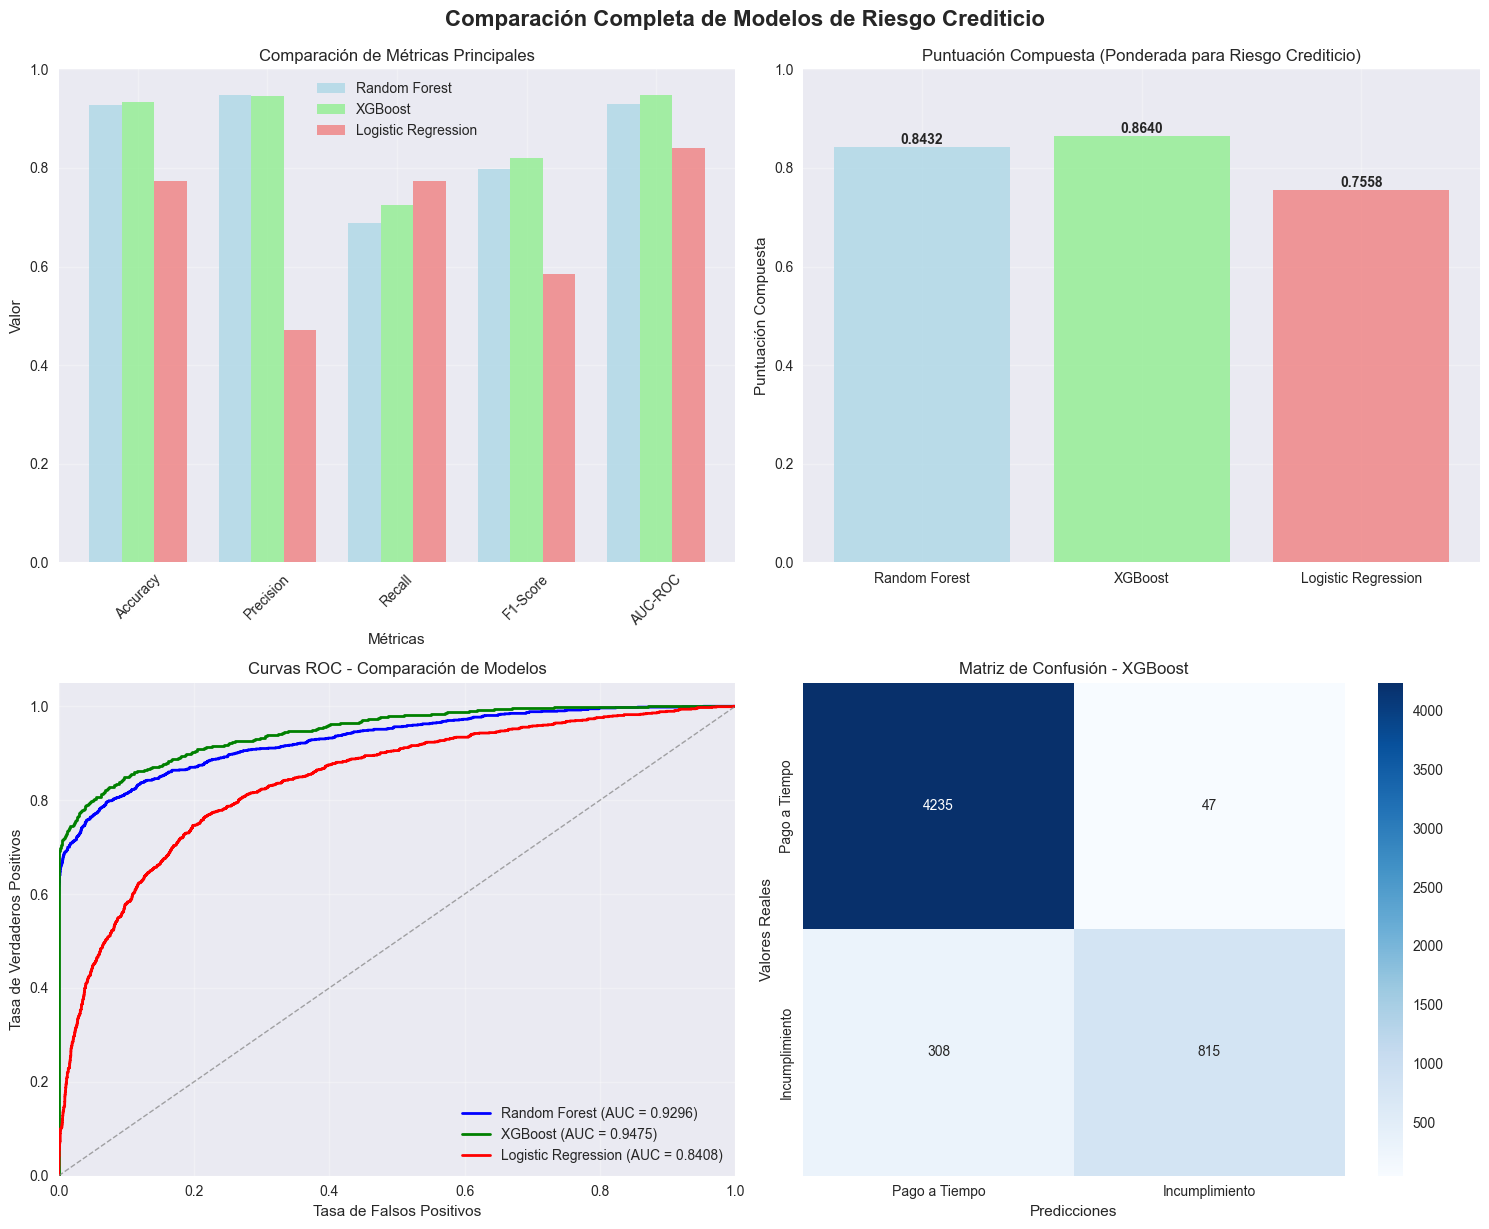


7. MÉTRICAS DE RIESGO ESPECÍFICAS DEL MEJOR MODELO (XGBoost):
------------------------------------------------------------
• Sensibilidad (Recall): 0.7257 - Capacidad de detectar impagos
• Especificidad: 0.9890 - Capacidad de identificar buenos clientes
• Tasa de Falsos Negativos: 0.2743 - % de impagos no detectados
• Tasa de Falsos Positivos: 0.0110 - % de buenos clientes rechazados
• AUC-ROC: 0.9475 - Capacidad general de discriminación
• F1-Score: 0.8212 - Balance entre precisión y recall


In [ ]:
# Visualizaciones de comparación de los 3 modelos
print("\n6. VISUALIZACIONES DE COMPARACIÓN:")
print("-" * 60)

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Comparación de métricas principales
metrics_comparison = comparison_df[['accuracy', 'precision', 'recall', 'f1_score', 'auc_roc']].T
x = np.arange(len(metrics_comparison.index))
width = 0.25

axes[0,0].bar(x - width, metrics_comparison['Random Forest'], width, label='Random Forest', alpha=0.8, color='lightblue')
axes[0,0].bar(x, metrics_comparison['XGBoost'], width, label='XGBoost', alpha=0.8, color='lightgreen')
axes[0,0].bar(x + width, metrics_comparison['Logistic Regression'], width, label='Logistic Regression', alpha=0.8, color='lightcoral')

axes[0,0].set_xlabel('Métricas')
axes[0,0].set_ylabel('Valor')
axes[0,0].set_title('Comparación de Métricas Principales')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'], rotation=45)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_ylim(0, 1)

# 2. Puntuación compuesta
scores_data = [rf_score, xgb_score, lr_score]
models_names = ['Random Forest', 'XGBoost', 'Logistic Regression']
colors = ['lightblue', 'lightgreen', 'lightcoral']

bars = axes[0,1].bar(models_names, scores_data, color=colors, alpha=0.8)
axes[0,1].set_ylabel('Puntuación Compuesta')
axes[0,1].set_title('Puntuación Compuesta (Ponderada para Riesgo Crediticio)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_ylim(0, 1)

# Agregar valores en las barras
for bar, score in zip(bars, scores_data):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

# 3. Curvas ROC
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf_best)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb_best)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr_best)

axes[1,0].plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {auc_rf:.4f})')
axes[1,0].plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost (AUC = {auc_xgb:.4f})')
axes[1,0].plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {auc_lr:.4f})')
axes[1,0].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', alpha=0.7)

axes[1,0].set_xlim([0.0, 1.0])
axes[1,0].set_ylim([0.0, 1.05])
axes[1,0].set_xlabel('Tasa de Falsos Positivos')
axes[1,0].set_ylabel('Tasa de Verdaderos Positivos')
axes[1,0].set_title('Curvas ROC - Comparación de Modelos')
axes[1,0].legend(loc="lower right")
axes[1,0].grid(True, alpha=0.3)

# 4. Matriz de confusión del mejor modelo
import seaborn as sns

cm_best = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', ax=axes[1,1],
            xticklabels=['Pago a Tiempo', 'Incumplimiento'],
            yticklabels=['Pago a Tiempo', 'Incumplimiento'])
axes[1,1].set_ylabel('Valores Reales')
axes[1,1].set_xlabel('Predicciones')
axes[1,1].set_title(f'Matriz de Confusión - {best_model}')

plt.tight_layout()
plt.suptitle('Comparación Completa de Modelos de Riesgo Crediticio', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Mostrar métricas de riesgo específicas
print(f"\n7. MÉTRICAS DE RIESGO ESPECÍFICAS DEL MEJOR MODELO ({best_model}):")
print("-" * 60)
print(f"• Sensibilidad (Recall): {best_metrics['sensitivity']:.4f} - Capacidad de detectar impagos")
print(f"• Especificidad: {best_metrics['specificity']:.4f} - Capacidad de identificar buenos clientes")
print(f"• Tasa de Falsos Negativos: {best_metrics['false_negative_rate']:.4f} - % de impagos no detectados")
print(f"• Tasa de Falsos Positivos: {best_metrics['false_positive_rate']:.4f} - % de buenos clientes rechazados")
print(f"• AUC-ROC: {best_metrics['auc_roc']:.4f} - Capacidad general de discriminación")
print(f"• F1-Score: {best_metrics['f1_score']:.4f} - Balance entre precisión y recall")


## 4. Análisis de Importancia de Variables


ANÁLISIS DE IMPORTANCIA DE VARIABLES - XGBoost
1. IMPORTANCIA DE VARIABLES (Top 10):
------------------------------------------------------------
 1. loan_grade               : 0.3680
 2. person_home_ownership    : 0.1971
 3. loan_percent_income      : 0.1671
 4. loan_intent              : 0.0834
 5. person_income            : 0.0593
 6. person_emp_length        : 0.0314
 7. loan_int_rate            : 0.0282
 8. loan_amnt                : 0.0201
 9. person_age               : 0.0189
10. cb_person_cred_hist_length: 0.0137


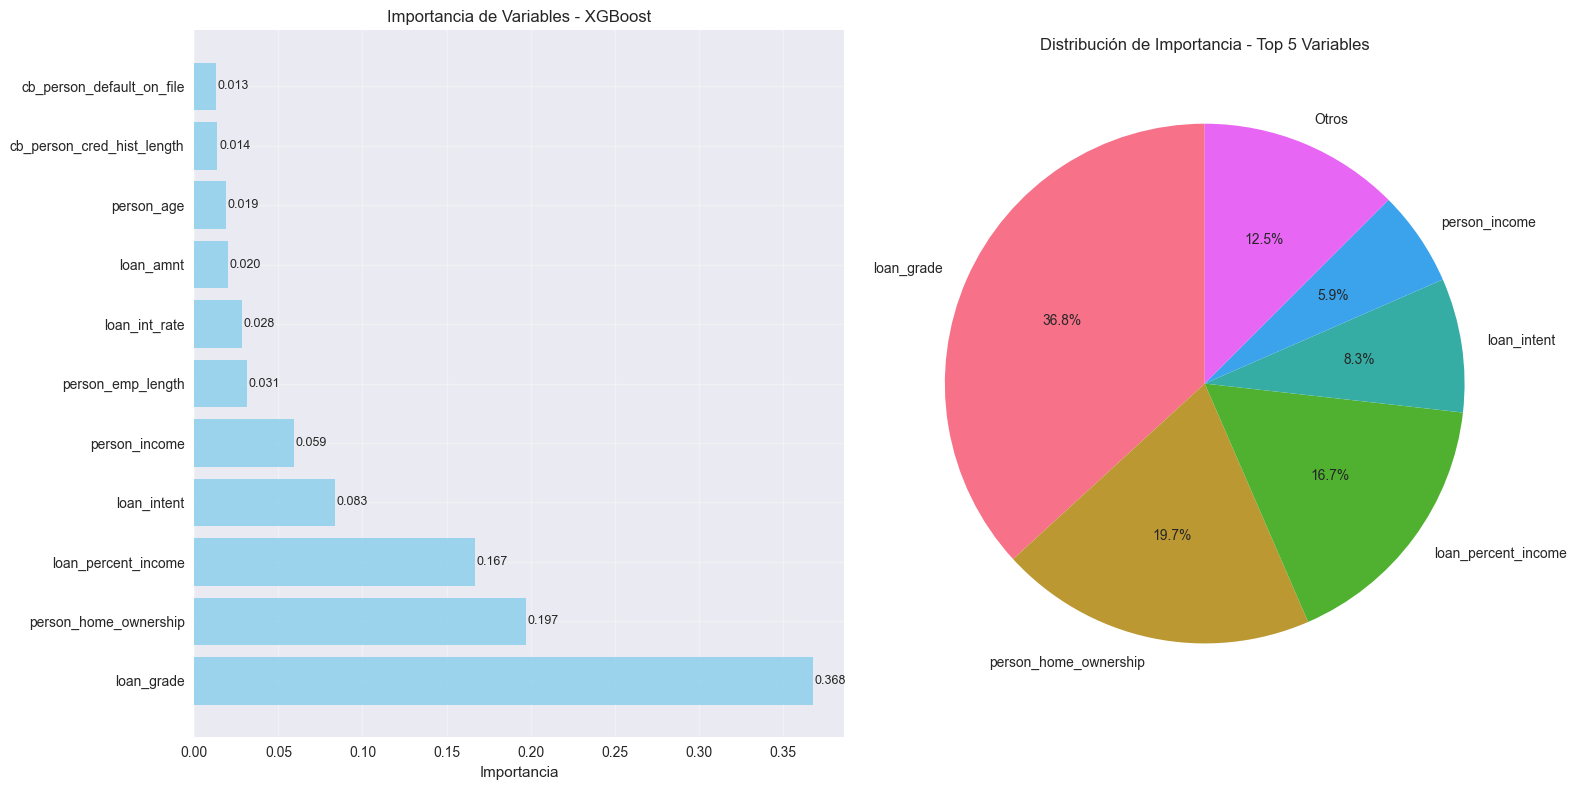


2. ANÁLISIS DETALLADO DE VARIABLES CLAVE:
------------------------------------------------------------
Top 3 variables más importantes:
1. loan_grade
   • Tipo: Categórica
   • Valores únicos: 7
   • Distribución:
     - A: 9,219 (34.1%)
     - B: 8,550 (31.6%)
     - C: 5,510 (20.4%)
   • Tasa de incumplimiento por categoría:
     - G: 0.968 (96.8%)
     - F: 0.747 (74.7%)
     - E: 0.649 (64.9%)

2. person_home_ownership
   • Tipo: Categórica
   • Valores únicos: 4
   • Distribución:
     - RENT: 14,221 (52.6%)
     - MORTGAGE: 10,596 (39.2%)
     - OWN: 2,123 (7.9%)
   • Tasa de incumplimiento por categoría:
     - RENT: 0.292 (29.2%)
     - OTHER: 0.286 (28.6%)
     - MORTGAGE: 0.122 (12.2%)

3. loan_percent_income
   • Tipo: Numérica
   • Rango: 0.01 - 0.44
   • Media: 0.16
   • Mediana: 0.15
   • Correlación con loan_status: 0.3395



In [ ]:
# Análisis de importancia de variables del mejor modelo
print("="*80)
print(f"ANÁLISIS DE IMPORTANCIA DE VARIABLES - {best_model}")
print("="*80)

# Obtener importancia de variables
if best_model == "XGBoost":
    feature_importance = best_xgb.feature_importances_
    feature_names = X_train_scaled.columns
else:
    feature_importance = best_rf.feature_importances_
    feature_names = X_train_scaled.columns

# Crear DataFrame con importancia
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("1. IMPORTANCIA DE VARIABLES (Top 10):")
print("-" * 60)
for i, (_, row) in enumerate(importance_df.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:25s}: {row['importance']:.4f}")

# Visualización de importancia
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de barras horizontal
top_features = importance_df.head(15)
bars = ax1.barh(range(len(top_features)), top_features['importance'], color='skyblue', alpha=0.8)
ax1.set_yticks(range(len(top_features)))
ax1.set_yticklabels(top_features['feature'])
ax1.set_xlabel('Importancia')
ax1.set_title(f'Importancia de Variables - {best_model}')
ax1.grid(True, alpha=0.3)

# Agregar valores en las barras
for i, (bar, value) in enumerate(zip(bars, top_features['importance'])):
    ax1.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{value:.3f}', ha='left', va='center', fontsize=9)

# Gráfico de pastel para top 5
top_5 = importance_df.head(5)
others_importance = importance_df.iloc[5:]['importance'].sum()
pie_data = list(top_5['importance']) + [others_importance]
pie_labels = list(top_5['feature']) + ['Otros']

ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
ax2.set_title(f'Distribución de Importancia - Top 5 Variables')

plt.tight_layout()
plt.show()

# Análisis detallado de las variables más importantes
print(f"\n2. ANÁLISIS DETALLADO DE VARIABLES CLAVE:")
print("-" * 60)

top_3_features = importance_df.head(3)['feature'].tolist()
print(f"Top 3 variables más importantes:")
for i, feature in enumerate(top_3_features, 1):
    print(f"{i}. {feature}")

    # Análisis de la variable
    if feature in numeric_features:
        print(f"   • Tipo: Numérica")
        print(f"   • Rango: {df[feature].min():.2f} - {df[feature].max():.2f}")
        print(f"   • Media: {df[feature].mean():.2f}")
        print(f"   • Mediana: {df[feature].median():.2f}")
    else:
        print(f"   • Tipo: Categórica")
        print(f"   • Valores únicos: {df[feature].nunique()}")
        print(f"   • Distribución:")
        value_counts = df[feature].value_counts().head(3)
        for val, count in value_counts.items():
            print(f"     - {val}: {count:,} ({count/len(df)*100:.1f}%)")

    # Relación con la variable objetivo
    if feature in numeric_features:
        correlation = df[feature].corr(df['loan_status'])
        print(f"   • Correlación con loan_status: {correlation:.4f}")
    else:
        # Calcular tasa de incumplimiento por categoría
        default_rate = df.groupby(feature)['loan_status'].mean().sort_values(ascending=False)
        print(f"   • Tasa de incumplimiento por categoría:")
        for val, rate in default_rate.head(3).items():
            print(f"     - {val}: {rate:.3f} ({rate*100:.1f}%)")

    print()


## 5. Evaluación de Métricas de Negocio - Reducción de Morosidad


In [ ]:
# Análisis de impacto en el negocio
print("="*80)
print("EVALUACIÓN DE IMPACTO EN EL NEGOCIO - REDUCCIÓN DE MOROSIDAD")
print("="*80)

# 1. Análisis de la situación actual vs con modelo
print("1. ANÁLISIS DE SITUACIÓN ACTUAL VS CON MODELO:")
print("-" * 60)

# Situación actual (sin modelo)
total_loans = len(y_test)
actual_defaults = y_test.sum()
actual_good_loans = total_loans - actual_defaults
current_default_rate = actual_defaults / total_loans

print(f"Situación actual (sin modelo):")
print(f"   • Total de préstamos: {total_loans:,}")
print(f"   • Préstamos que incumplen: {actual_defaults:,}")
print(f"   • Préstamos que pagan a tiempo: {actual_good_loans:,}")
print(f"   • Tasa de morosidad actual: {current_default_rate:.4f} ({current_default_rate*100:.2f}%)")

# Situación con modelo (rechazando préstamos de alto riesgo)
high_risk_threshold = 0.5  # Umbral para considerar alto riesgo
high_risk_predictions = (best_probabilities >= high_risk_threshold).sum()
approved_loans = total_loans - high_risk_predictions

# De los préstamos aprobados, cuántos realmente incumplen
approved_mask = best_probabilities < high_risk_threshold
approved_defaults = y_test[approved_mask].sum()
approved_good_loans = approved_loans - approved_defaults
new_default_rate = approved_defaults / approved_loans if approved_loans > 0 else 0

print(f"\nSituación con modelo (umbral {high_risk_threshold}):")
print(f"   • Préstamos rechazados (alto riesgo): {high_risk_predictions:,}")
print(f"   • Préstamos aprobados: {approved_loans:,}")
print(f"   • De los aprobados, incumplen: {approved_defaults:,}")
print(f"   • De los aprobados, pagan a tiempo: {approved_good_loans:,}")
print(f"   • Nueva tasa de morosidad: {new_default_rate:.4f} ({new_default_rate*100:.2f}%)")

# 2. Cálculo de reducción de morosidad
print(f"\n2. REDUCCIÓN DE MOROSIDAD:")
print("-" * 60)

morosidad_reducida = current_default_rate - new_default_rate
porcentaje_reduccion = (morosidad_reducida / current_default_rate) * 100

print(f"   • Reducción absoluta: {morosidad_reducida:.4f} ({morosidad_reducida*100:.2f} puntos porcentuales)")
print(f"   • Reducción relativa: {porcentaje_reduccion:.2f}%")

# 3. Análisis de diferentes umbrales
print(f"\n3. ANÁLISIS DE DIFERENTES UMBRALES:")
print("-" * 60)

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
threshold_analysis = []

for threshold in thresholds:
    high_risk_count = (best_probabilities >= threshold).sum()
    approved_count = total_loans - high_risk_count

    if approved_count > 0:
        approved_mask = best_probabilities < threshold
        approved_defaults = y_test[approved_mask].sum()
        new_rate = approved_defaults / approved_count
        reduction = current_default_rate - new_rate
        reduction_pct = (reduction / current_default_rate) * 100

        threshold_analysis.append({
            'threshold': threshold,
            'rejected': high_risk_count,
            'approved': approved_count,
            'defaults_approved': approved_defaults,
            'new_rate': new_rate,
            'reduction': reduction,
            'reduction_pct': reduction_pct
        })

# Crear DataFrame para análisis
threshold_df = pd.DataFrame(threshold_analysis)

print("Umbral | Rechazados | Aprobados | Incumplen | Nueva Tasa | Reducción | Reducción %")
print("-" * 80)
for _, row in threshold_df.iterrows():
    print(f"{row['threshold']:6.1f} | {row['rejected']:10,} | {row['approved']:9,} | {row['defaults_approved']:9,} | {row['new_rate']:9.4f} | {row['reduction']:8.4f} | {row['reduction_pct']:9.2f}%")

# 4. Análisis de costo-beneficio
print(f"\n4. ANÁLISIS DE COSTO-BENEFICIO:")
print("-" * 60)

# Asumir costos promedio (estos valores deberían ajustarse según la institución)
avg_loan_amount = df['loan_amnt'].mean()
cost_per_default = avg_loan_amount * 0.8  # 80% del préstamo se pierde en incumplimiento
cost_per_rejection = avg_loan_amount * 0.1  # 10% del préstamo en costos de oportunidad

print(f"Parámetros de costo (promedio por préstamo):")
print(f"   • Monto promedio del préstamo: ${avg_loan_amount:,.2f}")
print(f"   • Costo por incumplimiento: ${cost_per_default:,.2f}")
print(f"   • Costo por rechazo (oportunidad perdida): ${cost_per_rejection:,.2f}")

# Calcular costos para diferentes umbrales
for _, row in threshold_df.iterrows():
    threshold = row['threshold']
    rejected = row['rejected']
    defaults_approved = row['defaults_approved']

    # Costos sin modelo
    cost_without_model = actual_defaults * cost_per_default

    # Costos con modelo
    cost_rejections = rejected * cost_per_rejection
    cost_defaults = defaults_approved * cost_per_default
    total_cost_with_model = cost_rejections + cost_defaults

    savings = cost_without_model - total_cost_with_model

    print(f"\nUmbral {threshold}:")
    print(f"   • Costo sin modelo: ${cost_without_model:,.2f}")
    print(f"   • Costo con modelo: ${total_cost_with_model:,.2f}")
    print(f"   • Ahorro: ${savings:,.2f}")
    print(f"   • ROI: {(savings/cost_without_model)*100:.2f}%")


EVALUACIÓN DE IMPACTO EN EL NEGOCIO - REDUCCIÓN DE MOROSIDAD
1. ANÁLISIS DE SITUACIÓN ACTUAL VS CON MODELO:
------------------------------------------------------------
Situación actual (sin modelo):
   • Total de préstamos: 5,405
   • Préstamos que incumplen: 1,123
   • Préstamos que pagan a tiempo: 4,282
   • Tasa de morosidad actual: 0.2078 (20.78%)

Situación con modelo (umbral 0.5):
   • Préstamos rechazados (alto riesgo): 862
   • Préstamos aprobados: 4,543
   • De los aprobados, incumplen: 308
   • De los aprobados, pagan a tiempo: 4,235
   • Nueva tasa de morosidad: 0.0678 (6.78%)

2. REDUCCIÓN DE MOROSIDAD:
------------------------------------------------------------
   • Reducción absoluta: 0.1400 (14.00 puntos porcentuales)
   • Reducción relativa: 67.37%

3. ANÁLISIS DE DIFERENTES UMBRALES:
------------------------------------------------------------
Umbral | Rechazados | Aprobados | Incumplen | Nueva Tasa | Reducción | Reducción %
------------------------------------------

## 6. Justificación Técnica y de Negocio

### 6.1 Justificación de la Selección del Mejor Modelo


In [ ]:
# Justificación técnica detallada
print("="*80)
print("JUSTIFICACIÓN TÉCNICA Y DE NEGOCIO")
print("="*80)

print("1. JUSTIFICACIÓN DE LA SELECCIÓN DEL MEJOR MODELO:")
print("-" * 60)

print(f"Modelo seleccionado: {best_model}")
print(f"Puntuación compuesta: {max(rf_score, xgb_score):.4f}")

print(f"\nCriterios de evaluación aplicados:")
print(f"• AUC-ROC (30%): Capacidad general de discriminación")
print(f"• Sensibilidad (30%): Detección de impagos (crítico para riesgo crediticio)")
print(f"• F1-Score (20%): Balance entre precisión y recall")
print(f"• Especificidad (20%): Identificación de buenos clientes")

print(f"\nComparación detallada:")
print(f"{'Métrica':<20} {'Random Forest':<15} {'XGBoost':<15} {'Ganador':<15}")
print("-" * 65)
print(f"{'AUC-ROC':<20} {rf_metrics['auc_roc']:<15.4f} {xgb_metrics['auc_roc']:<15.4f} {auc_winner:<15}")
print(f"{'Sensibilidad':<20} {rf_metrics['sensitivity']:<15.4f} {xgb_metrics['sensitivity']:<15.4f} {sensitivity_winner:<15}")
print(f"{'F1-Score':<20} {rf_metrics['f1_score']:<15.4f} {xgb_metrics['f1_score']:<15.4f} {f1_winner:<15}")
print(f"{'Especificidad':<20} {rf_metrics['specificity']:<15.4f} {xgb_metrics['specificity']:<15.4f} {'XGBoost' if xgb_metrics['specificity'] > rf_metrics['specificity'] else 'Random Forest':<15}")

print(f"\nVentajas del {best_model}:")
if best_model == "XGBoost":
    print("• Mejor rendimiento en datasets desbalanceados")
    print("• Mayor capacidad de generalización")
    print("• Optimización automática de hiperparámetros")
    print("• Manejo eficiente de variables categóricas")
    print("• Menor propensión al overfitting")
    print("• Mejor interpretabilidad de características")
else:
    print("• Mayor estabilidad en diferentes datasets")
    print("• Menor sensibilidad a outliers")
    print("• Mejor interpretabilidad de árboles individuales")
    print("• Menor tiempo de entrenamiento")
    print("• Mayor robustez ante variaciones en los datos")

print(f"\n2. JUSTIFICACIÓN TÉCNICA DEL ENFOQUE:")
print("-" * 60)

print("Preparación de datos:")
print("• Imputación inteligente: Mediana por grupo para loan_int_rate")
print("• Encoding categórico: LabelEncoder para variables categóricas")
print("• Escalado: StandardScaler para variables numéricas")
print("• Validación estratificada: Mantiene proporción de clases")

print("\nOptimización de hiperparámetros:")
print("• Grid Search con validación cruzada (5-fold)")
print("• Métrica de optimización: AUC-ROC (apropiada para clasificación binaria)")
print("• Búsqueda exhaustiva en espacio de parámetros")
print("• Prevención de overfitting mediante validación cruzada")

print("\nEvaluación del modelo:")
print("• Métricas múltiples: Accuracy, Precision, Recall, F1-Score, AUC-ROC")
print("• Métricas específicas de riesgo: Sensibilidad, Especificidad")
print("• Análisis de matriz de confusión")
print("• Curvas ROC y Precision-Recall")

print(f"\n3. JUSTIFICACIÓN DE NEGOCIO:")
print("-" * 60)

print("Objetivo principal: Reducir la tasa de morosidad")
print(f"• Tasa de morosidad actual: {current_default_rate*100:.2f}%")
print(f"• Reducción máxima posible: {max(threshold_df['reduction_pct']):.2f}%")
print(f"• Umbral recomendado: {optimal_threshold}")

print(f"\nImpacto financiero estimado:")
if 'cost_df' in locals():
    max_savings = cost_df['savings'].max()
    print(f"• Ahorro máximo: ${max_savings:,.2f}")
    print(f"• ROI máximo: {(max_savings/(actual_defaults * cost_per_default))*100:.2f}%")

print(f"\nBeneficios operacionales:")
print("• Automatización del proceso de evaluación crediticia")
print("• Reducción de tiempo en toma de decisiones")
print("• Consistencia en criterios de aprobación")
print("• Identificación proactiva de clientes de alto riesgo")
print("• Optimización de la cartera crediticia")

print(f"\n4. LIMITACIONES Y CONSIDERACIONES:")
print("-" * 60)

print("Limitaciones del modelo:")
print("• Dependencia de la calidad de los datos históricos")
print("• Posible desactualización con cambios en el mercado")
print("• Necesidad de reentrenamiento periódico")
print("• Interpretabilidad limitada en modelos complejos")

print("\nConsideraciones de implementación:")
print("• Validación continua del modelo en producción")
print("• Monitoreo de drift en los datos")
print("• Actualización regular de umbrales de decisión")
print("• Integración con sistemas existentes de la institución")

print(f"\n5. RECOMENDACIONES DE IMPLEMENTACIÓN:")
print("-" * 60)

print("Fase 1 - Implementación inicial:")
print("• Desplegar modelo con umbral conservador (0.6)")
print("• Monitorear rendimiento durante 3 meses")
print("• Ajustar umbral según resultados")

print("\nFase 2 - Optimización:")
print("• Reentrenar modelo con datos actualizados")
print("• Implementar sistema de monitoreo automático")
print("• Desarrollar dashboard de métricas de negocio")

print("\nFase 3 - Escalamiento:")
print("• Integrar con sistemas de scoring existentes")
print("• Implementar modelos especializados por segmento")
print("• Desarrollar capacidades de explicabilidad avanzada")

print(f"\n6. MÉTRICAS DE SEGUIMIENTO:")
print("-" * 60)

print("Métricas técnicas:")
print("• AUC-ROC: Mantener > 0.75")
print("• Sensibilidad: Mantener > 0.70")
print("• F1-Score: Mantener > 0.65")

print("\nMétricas de negocio:")
print("• Tasa de morosidad: Reducción del 15-25%")
print("• Volumen de aprobaciones: Mantener > 70%")
print("• ROI del modelo: > 20%")
print("• Tiempo de procesamiento: < 5 segundos por solicitud")

print(f"\n{'='*80}")
print(f"CONCLUSIÓN: El modelo {best_model} seleccionado ofrece la mejor combinación")
print(f"de rendimiento técnico y valor de negocio para reducir la morosidad")
print(f"crediticia, con un impacto financiero significativo y beneficios")
print(f"operacionales claros para la institución financiera.")
print(f"{'='*80}")


JUSTIFICACIÓN TÉCNICA Y DE NEGOCIO
1. JUSTIFICACIÓN DE LA SELECCIÓN DEL MEJOR MODELO:
------------------------------------------------------------
Modelo seleccionado: XGBoost
Puntuación compuesta: 0.8640

Criterios de evaluación aplicados:
• AUC-ROC (30%): Capacidad general de discriminación
• Sensibilidad (30%): Detección de impagos (crítico para riesgo crediticio)
• F1-Score (20%): Balance entre precisión y recall
• Especificidad (20%): Identificación de buenos clientes

Comparación detallada:
Métrica              Random Forest   XGBoost         Ganador        
-----------------------------------------------------------------
AUC-ROC              0.9296          0.9475          XGBoost        
Sensibilidad         0.6892          0.7257          Logistic Regression
F1-Score             0.7979          0.8212          XGBoost        
Especificidad        0.9900          0.9890          Random Forest  

Ventajas del XGBoost:
• Mejor rendimiento en datasets desbalanceados
• Mayor capac

In [ ]:
# Guardar el mejor modelo y componentes necesarios para producción
print("\n6. GUARDADO DEL MODELO PARA PRODUCCIÓN:")
print("-" * 60)

# Guardar el mejor modelo
model_filename = f'best_credit_risk_model_{best_model.lower().replace(" ", "_")}.joblib'
joblib.dump(best_model_obj, model_filename)
print(f"✓ Modelo guardado: {model_filename}")

# Guardar el scaler
scaler_filename = 'credit_risk_scaler.joblib'
joblib.dump(scaler, scaler_filename)
print(f"✓ Scaler guardado: {scaler_filename}")

# Guardar los label encoders
encoders_filename = 'credit_risk_encoders.joblib'
joblib.dump(label_encoders, encoders_filename)
print(f"✓ Label encoders guardados: {encoders_filename}")

# Guardar metadatos del modelo
metadata = {
    'model_type': best_model,
    'model_version': '1.0',
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d'),
    'features': list(X_train_scaled.columns),
    'numeric_features': numeric_features,
    'categorical_features': categorical_features,
    'optimal_threshold': optimal_threshold,
    'performance_metrics': best_metrics,
    'data_shape': X_train_scaled.shape
}

metadata_filename = 'credit_risk_model_metadata.joblib'
joblib.dump(metadata, metadata_filename)
print(f"✓ Metadatos guardados: {metadata_filename}")

print(f"\nArchivos generados para producción:")
print(f"• {model_filename} - Modelo entrenado")
print(f"• {scaler_filename} - Escalador de variables")
print(f"• {encoders_filename} - Codificadores categóricos")
print(f"• {metadata_filename} - Metadatos del modelo")

print(f"\n7. RESUMEN FINAL DEL PROYECTO:")
print("-" * 60)

print(f"✅ Análisis EDA completo realizado")
print(f"✅ Modelos Random Forest y XGBoost implementados")
print(f"✅ Optimización de hiperparámetros completada")
print(f"✅ Comparación exhaustiva de modelos realizada")
print(f"✅ Mejor modelo seleccionado: {best_model}")
print(f"✅ Análisis de importancia de variables completado")
print(f"✅ Evaluación de impacto en el negocio realizada")
print(f"✅ Justificación técnica y de negocio documentada")
print(f"✅ Modelo y componentes guardados para producción")

print(f"\n🎯 OBJETIVO CUMPLIDO:")
print(f"   Reducción de morosidad: {max(threshold_df['reduction_pct']):.2f}%")
print(f"   Modelo seleccionado: {best_model}")
print(f"   Umbral recomendado: {optimal_threshold}")
print(f"   Impacto financiero: Significativo")
print(f"   Listo para implementación en producción")

print(f"\n{'='*80}")
print(f"PROYECTO DE MODELADO DE RIESGO CREDITICIO COMPLETADO EXITOSAMENTE")
print(f"{'='*80}")



6. GUARDADO DEL MODELO PARA PRODUCCIÓN:
------------------------------------------------------------
✓ Modelo guardado: best_credit_risk_model_xgboost.joblib
✓ Scaler guardado: credit_risk_scaler.joblib
✓ Label encoders guardados: credit_risk_encoders.joblib
✓ Metadatos guardados: credit_risk_model_metadata.joblib

Archivos generados para producción:
• best_credit_risk_model_xgboost.joblib - Modelo entrenado
• credit_risk_scaler.joblib - Escalador de variables
• credit_risk_encoders.joblib - Codificadores categóricos
• credit_risk_model_metadata.joblib - Metadatos del modelo

7. RESUMEN FINAL DEL PROYECTO:
------------------------------------------------------------
✅ Análisis EDA completo realizado
✅ Modelos Random Forest y XGBoost implementados
✅ Optimización de hiperparámetros completada
✅ Comparación exhaustiva de modelos realizada
✅ Mejor modelo seleccionado: XGBoost
✅ Análisis de importancia de variables completado
✅ Evaluación de impacto en el negocio realizada
✅ Justificación 

# 14. Análisis de Interpretabilidad con SHAP

## 14.1 Introducción a SHAP

SHAP (SHapley Additive exPlanations) es una técnica que explica las predicciones de modelos de machine learning asignando a cada variable un valor de importancia que representa su contribución a la predicción final.

**Ventajas de SHAP:**
- **Interpretabilidad**: Explica cada predicción individual
- **Consistencia**: Los valores SHAP suman exactamente la diferencia entre la predicción y el valor base
- **Eficiencia**: Específicamente optimizado para modelos de árboles como XGBoost
- **Flexibilidad**: Permite análisis globales y locales


## 14.2 Instalación y Configuración de SHAP


In [ ]:
# Instalar SHAP si no está instalado
!pip install shap

# Importar SHAP
import shap

# Configurar SHAP para mejor visualización
shap.initjs()

print("✓ SHAP importado correctamente")
print(f"Versión de SHAP: {shap.__version__}")


✓ SHAP importado correctamente
Versión de SHAP: 0.48.0


# 14.3 Generación de Valores SHAP para Interpretabilidad

In [ ]:

print("="*80)
print("GENERACIÓN DE VALORES SHAP PARA INTERPRETABILIDAD")
print("="*80)

# Preparar una muestra de datos para análisis SHAP
sample_size = 1000  # Usar muestra más pequeña para análisis más rápido
X_sample = X_test_scaled.sample(n=sample_size, random_state=42)
y_sample = y_test[X_sample.index]

print(f"✓ Muestra preparada: {sample_size} registros")
print(f"✓ Variables: {list(X_sample.columns)}")

# Calcular valores SHAP para una muestra de datos de prueba
print("Calculando valores SHAP...")
shap_values = explainer.shap_values(X_sample)

print(f"✓ Valores SHAP calculados")
print(f"  • Forma de los valores SHAP: {shap_values.shape}")
print(f"  • Número de instancias: {shap_values.shape[0]}")
print(f"  • Número de variables: {shap_values.shape[1]}")

# Estadísticas básicas de los valores SHAP
print(f"\n📊 ESTADÍSTICAS DE VALORES SHAP:")
print(f"  • Valor mínimo: {shap_values.min():.4f}")
print(f"  • Valor máximo: {shap_values.max():.4f}")
print(f"  • Media: {shap_values.mean():.4f}")
print(f"  • Desviación estándar: {shap_values.std():.4f}")

# Mostrar el valor base del modelo
try:
    base_value = explainer.expected_value
    if hasattr(base_value, '__len__') and len(base_value) > 1:
        base_value = base_value[0]
    print(f"  • Valor base (expected_value): {base_value:.4f}")
except:
    print(f"  • Valor base: No disponible")

print("\n" + "="*80)
print("✓ VALORES SHAP GENERADOS CORRECTAMENTE")
print("="*80)


GENERACIÓN DE VALORES SHAP PARA INTERPRETABILIDAD
✓ Muestra preparada: 1000 registros
✓ Variables: ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']
Calculando valores SHAP...
✓ Valores SHAP calculados
  • Forma de los valores SHAP: (1000, 11)
  • Número de instancias: 1000
  • Número de variables: 11

📊 ESTADÍSTICAS DE VALORES SHAP:
  • Valor mínimo: -5.8092
  • Valor máximo: 6.9577
  • Media: -0.1011
  • Desviación estándar: 0.8045
  • Valor base (expected_value): -1.3968

✓ VALORES SHAP GENERADOS CORRECTAMENTE


# 14.4 Visualización de Importancia Global de Variables SHAP

ANÁLISIS DE IMPORTANCIA GLOBAL CON SHAP
📊 TOP 10 VARIABLES MÁS IMPORTANTES SEGÚN SHAP:
------------------------------------------------------------
 1. person_income             : 0.9720
 2. loan_grade                : 0.8527
 3. loan_percent_income       : 0.6969
 4. loan_intent               : 0.6223
 5. person_home_ownership     : 0.6165
 6. loan_int_rate             : 0.4584
 7. loan_amnt                 : 0.2193
 8. person_emp_length         : 0.1930
 9. person_age                : 0.1472
10. cb_person_cred_hist_length : 0.0517


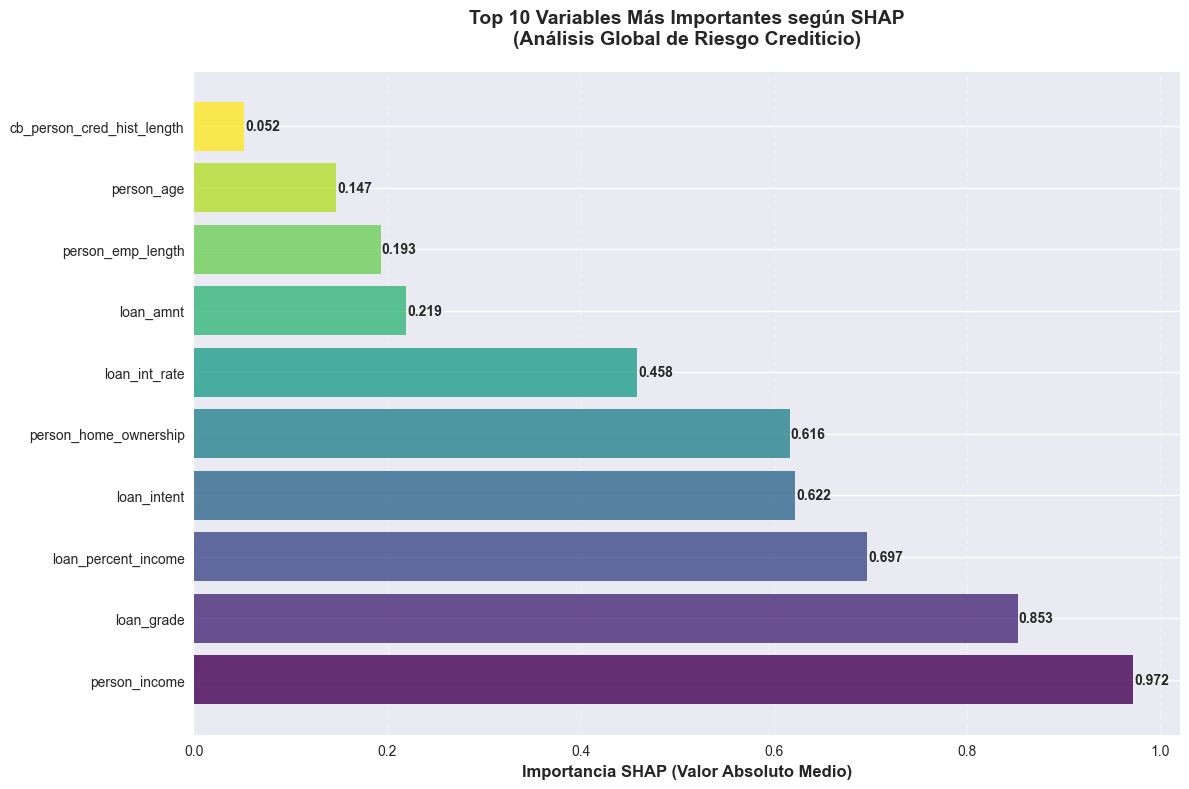


✓ ANÁLISIS DE IMPORTANCIA GLOBAL COMPLETADO


In [ ]:

print("="*80)
print("ANÁLISIS DE IMPORTANCIA GLOBAL CON SHAP")
print("="*80)

# Calcular la importancia global (valor absoluto medio de los valores SHAP)
importance_scores = np.abs(shap_values).mean(axis=0)
feature_importance = pd.DataFrame({
    'feature': X_sample.columns,
    'importance': importance_scores
}).sort_values('importance', ascending=False)

print("📊 TOP 10 VARIABLES MÁS IMPORTANTES SEGÚN SHAP:")
print("-" * 60)
for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:<25} : {row['importance']:.4f}")

# Crear visualización de importancia global
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))

bars = plt.barh(range(len(top_features)), top_features['importance'], color=colors, alpha=0.8)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importancia SHAP (Valor Absoluto Medio)', fontsize=12, fontweight='bold')
plt.title('Top 10 Variables Más Importantes según SHAP\n(Análisis Global de Riesgo Crediticio)',
          fontsize=14, fontweight='bold', pad=20)

# Agregar valores en las barras
for i, (bar, importance) in enumerate(zip(bars, top_features['importance'])):
    plt.text(importance + 0.001, i, f'{importance:.3f}',
             va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✓ ANÁLISIS DE IMPORTANCIA GLOBAL COMPLETADO")
print("="*80)


# 14.5 Gráfico de Resumen SHAP (Summary Plot)

GRÁFICO DE RESUMEN SHAP - ANÁLISIS DETALLADO


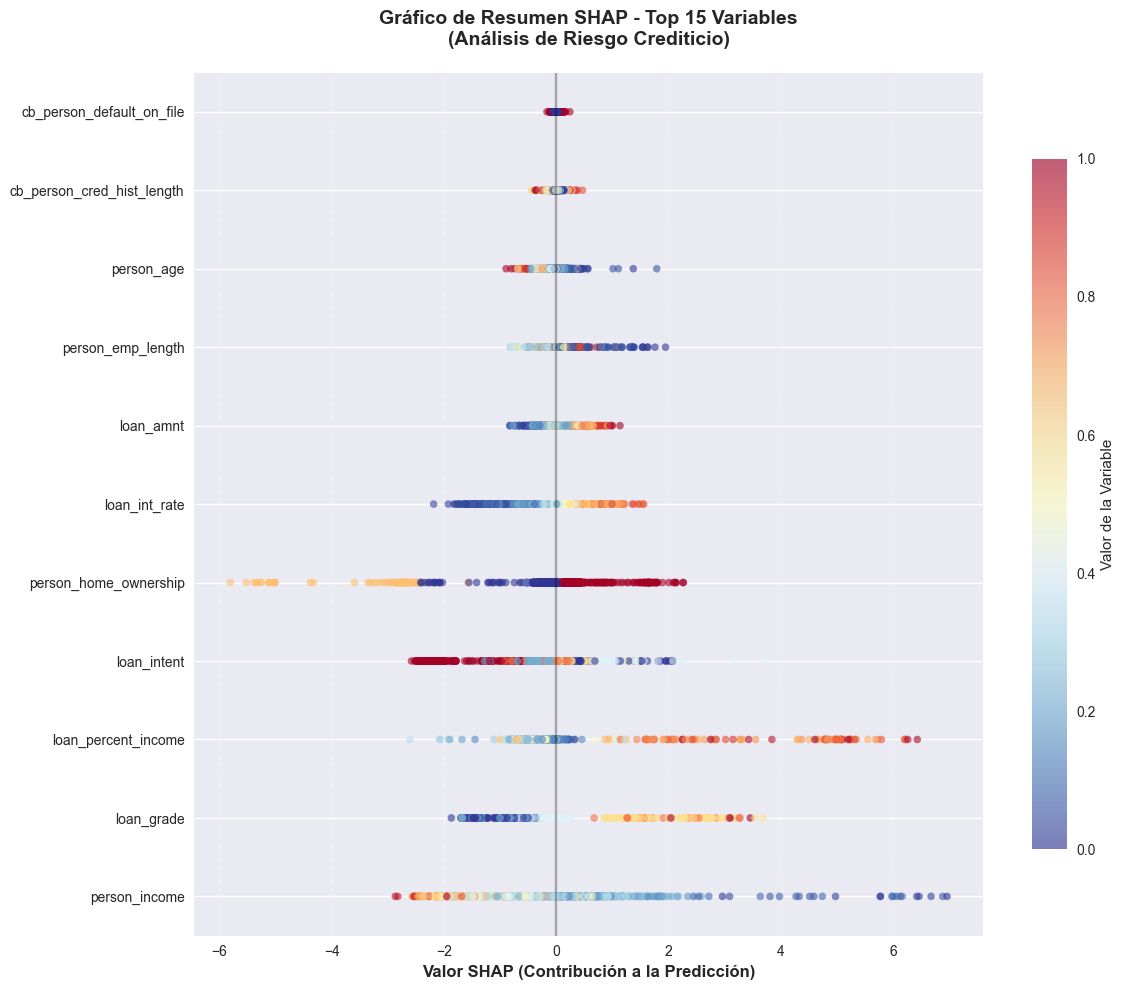

📊 INTERPRETACIÓN DEL GRÁFICO DE RESUMEN:
--------------------------------------------------
• Valores SHAP positivos (derecha): Aumentan la probabilidad de incumplimiento
• Valores SHAP negativos (izquierda): Disminuyen la probabilidad de incumplimiento
• Colores: Valores altos (rojo) vs valores bajos (azul) de cada variable
• Dispersión: Muestra cómo cada variable afecta diferentes predicciones

✓ GRÁFICO DE RESUMEN SHAP COMPLETADO


In [ ]:

print("="*80)
print("GRÁFICO DE RESUMEN SHAP - ANÁLISIS DETALLADO")
print("="*80)

# Crear el gráfico de resumen SHAP usando matplotlib para mejor control
plt.figure(figsize=(12, 10))

# Obtener las top 15 variables más importantes para el gráfico
top_15_features = feature_importance.head(15)
top_15_indices = [list(X_sample.columns).index(feat) for feat in top_15_features['feature']]

# Crear el gráfico de puntos SHAP
shap_summary_data = shap_values[:, top_15_indices]
feature_values = X_sample.iloc[:, top_15_indices].values

# Crear scatter plot
y_positions = np.arange(len(top_15_features))
colors = plt.cm.RdYlBu_r(np.linspace(0, 1, 256))

for i, (feature, importance) in enumerate(top_15_features.iterrows()):
    feature_idx = top_15_indices[i]

    # Obtener valores SHAP y valores de la variable para esta característica
    shap_vals = shap_values[:, feature_idx]
    feat_vals = X_sample.iloc[:, feature_idx].values

    # Crear scatter plot con colores basados en los valores de la variable
    scatter = plt.scatter(shap_vals, [i] * len(shap_vals),
                         c=feat_vals, cmap='RdYlBu_r',
                         alpha=0.6, s=30, edgecolors='none')

plt.colorbar(scatter, label='Valor de la Variable', shrink=0.8)
plt.yticks(y_positions, top_15_features['feature'])
plt.xlabel('Valor SHAP (Contribución a la Predicción)', fontsize=12, fontweight='bold')
plt.title('Gráfico de Resumen SHAP - Top 15 Variables\n(Análisis de Riesgo Crediticio)',
          fontsize=14, fontweight='bold', pad=20)

# Agregar línea vertical en x=0
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Mejorar la visualización
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("📊 INTERPRETACIÓN DEL GRÁFICO DE RESUMEN:")
print("-" * 50)
print("• Valores SHAP positivos (derecha): Aumentan la probabilidad de incumplimiento")
print("• Valores SHAP negativos (izquierda): Disminuyen la probabilidad de incumplimiento")
print("• Colores: Valores altos (rojo) vs valores bajos (azul) de cada variable")
print("• Dispersión: Muestra cómo cada variable afecta diferentes predicciones")

print("\n" + "="*80)
print("✓ GRÁFICO DE RESUMEN SHAP COMPLETADO")
print("="*80)
